# Model training to predict bike trips in cities SJ, SF, MV, RE, PA

In [ ]:
import seaborn as sb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Reading the training data
train_sf = pd.read_csv('train_sf_1.csv')
train_mv = pd.read_csv('train_mv_1.csv')
train_sj = pd.read_csv('train_sj_1.csv')
train_re = pd.read_csv('train_re_1.csv')
train_pa = pd.read_csv('train_pa_1.csv')

In [ ]:
# Convert all column datatype to float
train_sf = train_sf.astype(float)
train_mv = train_mv.astype(float)
train_sj = train_sj.astype(float)
train_re = train_re.astype(float)
train_pa = train_pa.astype(float)

In [ ]:
train_sf.head()

,Unnamed: 0,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,cloud_cover,wind_dir_degrees,zip_code,holiday,business_day,month,weekday,fog,fog-rain,rain
0,0.0,56.0,49.0,41.0,45.0,40.0,36.0,83.0,69.0,55.0,...,3.0,290.0,94107.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,56.0,47.0,38.0,27.0,20.0,14.0,54.0,37.0,20.0,...,1.0,40.0,94107.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,2.0,60.0,54.0,48.0,48.0,46.0,43.0,89.0,75.0,60.0,...,4.0,310.0,94107.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,3.0,60.0,54.0,47.0,52.0,49.0,45.0,93.0,83.0,72.0,...,6.0,280.0,94107.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,4.0,58.0,52.0,46.0,51.0,46.0,42.0,93.0,83.0,72.0,...,4.0,281.0,94107.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
train_sf.shape

(731, 30)

In [ ]:
train_mv.head()

,Unnamed: 0,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,cloud_cover,wind_dir_degrees,zip_code,holiday,business_day,month,weekday,fog,rain,fog-rain
0,0.0,59.0,48.0,36.0,42.0,36.0,32.0,85.0,63.0,40.0,...,0.0,348.0,94301.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,64.0,53.0,41.0,49.0,44.0,37.0,89.0,71.0,52.0,...,2.0,350.0,94301.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,2.0,59.0,54.0,50.0,54.0,52.0,48.0,100.0,92.0,82.0,...,6.0,350.0,94301.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.0,57.0,52.0,48.0,52.0,51.0,48.0,100.0,94.0,82.0,...,5.0,6.0,94301.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,4.0,62.0,55.0,48.0,54.0,50.0,48.0,100.0,86.0,63.0,...,1.0,357.0,94301.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
train_re.head()

,Unnamed: 0,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,cloud_cover,wind_dir_degrees,zip_code,holiday,business_day,month,weekday,fog,fog-rain,rain
0,0.0,59.0,54.0,48.0,54.0,48.0,46.0,100.0,90.0,67.0,...,3.0,325.0,94063.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,59.0,50.0,41.0,46.0,41.0,36.0,100.0,78.0,44.0,...,2.0,271.0,94063.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2.0,62.0,53.0,44.0,50.0,46.0,43.0,100.0,90.0,59.0,...,1.0,36.0,94063.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,3.0,62.0,53.0,44.0,48.0,43.0,37.0,100.0,78.0,45.0,...,1.0,192.0,94063.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,4.0,69.0,55.0,41.0,45.0,33.0,27.0,81.0,54.0,20.0,...,0.0,222.0,94063.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
train_sj.head()

,Unnamed: 0,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,cloud_cover,wind_dir_degrees,zip_code,holiday,business_day,month,weekday,fog,fog-rain,rain
0,0.0,62.0,52.0,41.0,48.0,43.0,37.0,86.0,69.0,52.0,...,3.0,297.0,95113.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,61.0,54.0,46.0,50.0,47.0,44.0,100.0,80.0,60.0,...,4.0,293.0,95113.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2.0,59.0,51.0,43.0,50.0,44.0,40.0,93.0,78.0,62.0,...,4.0,349.0,95113.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.0,55.0,50.0,44.0,50.0,47.0,43.0,100.0,92.0,83.0,...,6.0,292.0,95113.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,4.0,60.0,52.0,43.0,46.0,41.0,35.0,100.0,72.0,44.0,...,3.0,264.0,95113.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Count the number of columns in the dataset
len(train_sf.columns)

30

In [ ]:
# Count the number of columns in the dataset
len(train_sj.columns)

30

In [ ]:
# Count the number of columns in the dataset
len(train_mv.columns)

30

In [ ]:
# Count the number of columns in the dataset
len(train_pa.columns)

30

In [ ]:
# Count the number of columns in the dataset
len(train_re.columns)

30

In [ ]:
#adding fog-rain col in train_pa and train_mv dataset
train_pa['fog-rain'] = 0.0
train_mv['fog-rain'] = 0.0

In [ ]:
# Get list of columns
train_sf.shape

(731, 29)

In [ ]:
train_mv.shape

(655, 29)

In [ ]:
train_re.shape

(547, 29)

In [ ]:
train_sj.shape

(700, 29)

In [ ]:
train_pa.shape

(651, 29)

In [ ]:
# Get the types for each column
train_sf.dtypes

max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    float64
min_sea_level_pressure_inches     float64
max_visibility_miles              float64
mean_visibility_miles             float64
min_visibility_miles              float64
max_wind_Speed_mph                float64
mean_wind_speed_mph               float64
max_gust_speed_mph                float64
precipitation_inches              float64
cloud_cover                       float64
wind_dir_degrees                  float64
zip_code                          float64
holiday                           float64
business_day                      

In [ ]:
train_sf.to_csv('train_sf_1.csv')
train_sj.to_csv('train_sj_1.csv')
train_mv.to_csv('train_mv_1.csv')
train_pa.to_csv('train_pa_1.csv')
train_re.to_csv('train_re_1.csv')

In [ ]:
# Loading the labels from csv
train_sf_1 = pd.read_csv('train_sf_1.csv')
train_sj_1 = pd.read_csv('train_sj_1.csv')
train_mv_1 = pd.read_csv('train_mv_1.csv')
train_pa_1 = pd.read_csv('train_pa_1.csv')
train_re_1 = pd.read_csv('train_re_1.csv')

In [ ]:
train_sf_1.head()

,Unnamed: 0,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,cloud_cover,wind_dir_degrees,zip_code,holiday,business_day,month,weekday,fog,fog-rain,rain
0,0,56.0,49.0,41.0,45.0,40.0,36.0,83.0,69.0,55.0,...,3.0,290.0,94107.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,56.0,47.0,38.0,27.0,20.0,14.0,54.0,37.0,20.0,...,1.0,40.0,94107.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,2,60.0,54.0,48.0,48.0,46.0,43.0,89.0,75.0,60.0,...,4.0,310.0,94107.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,3,60.0,54.0,47.0,52.0,49.0,45.0,93.0,83.0,72.0,...,6.0,280.0,94107.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,4,58.0,52.0,46.0,51.0,46.0,42.0,93.0,83.0,72.0,...,4.0,281.0,94107.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
train_sj_1.head()

,Unnamed: 0,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,cloud_cover,wind_dir_degrees,zip_code,holiday,business_day,month,weekday,fog,fog-rain,rain
0,0,62.0,52.0,41.0,48.0,43.0,37.0,86.0,69.0,52.0,...,3.0,297.0,95113.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,61.0,54.0,46.0,50.0,47.0,44.0,100.0,80.0,60.0,...,4.0,293.0,95113.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,59.0,51.0,43.0,50.0,44.0,40.0,93.0,78.0,62.0,...,4.0,349.0,95113.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,55.0,50.0,44.0,50.0,47.0,43.0,100.0,92.0,83.0,...,6.0,292.0,95113.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,4,60.0,52.0,43.0,46.0,41.0,35.0,100.0,72.0,44.0,...,3.0,264.0,95113.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
train_mv_1.head()

,Unnamed: 0,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,cloud_cover,wind_dir_degrees,zip_code,holiday,business_day,month,weekday,fog,rain,fog-rain
0,0,59.0,48.0,36.0,42.0,36.0,32.0,85.0,63.0,40.0,...,0.0,348.0,94301.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,64.0,53.0,41.0,49.0,44.0,37.0,89.0,71.0,52.0,...,2.0,350.0,94301.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,2,59.0,54.0,50.0,54.0,52.0,48.0,100.0,92.0,82.0,...,6.0,350.0,94301.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,57.0,52.0,48.0,52.0,51.0,48.0,100.0,94.0,82.0,...,5.0,6.0,94301.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,4,62.0,55.0,48.0,54.0,50.0,48.0,100.0,86.0,63.0,...,1.0,357.0,94301.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
train_pa_1.head()

,Unnamed: 0,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,cloud_cover,wind_dir_degrees,zip_code,holiday,business_day,month,weekday,fog,rain,fog-rain
0,0,59.0,48.0,36.0,42.0,36.0,32.0,85.0,63.0,40.0,...,0.0,348.0,94301.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,64.0,53.0,41.0,49.0,44.0,37.0,89.0,71.0,52.0,...,2.0,350.0,94301.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,2,57.0,52.0,48.0,52.0,51.0,48.0,100.0,94.0,82.0,...,5.0,6.0,94301.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,3,60.0,51.0,42.0,45.0,41.0,36.0,93.0,68.0,42.0,...,2.0,293.0,94301.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,62.0,55.0,48.0,54.0,50.0,48.0,100.0,86.0,63.0,...,1.0,357.0,94301.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
train_re_1.head()

,Unnamed: 0,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,cloud_cover,wind_dir_degrees,zip_code,holiday,business_day,month,weekday,fog,fog-rain,rain
0,0,59.0,54.0,48.0,54.0,48.0,46.0,100.0,90.0,67.0,...,3.0,325.0,94063.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,59.0,50.0,41.0,46.0,41.0,36.0,100.0,78.0,44.0,...,2.0,271.0,94063.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,62.0,53.0,44.0,50.0,46.0,43.0,100.0,90.0,59.0,...,1.0,36.0,94063.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,3,62.0,53.0,44.0,48.0,43.0,37.0,100.0,78.0,45.0,...,1.0,192.0,94063.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,4,69.0,55.0,41.0,45.0,33.0,27.0,81.0,54.0,20.0,...,0.0,222.0,94063.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
train_mv.drop(columns=['Unnamed: 0'], inplace=True)
train_sj.drop(columns=['Unnamed: 0'], inplace=True)
train_sf.drop(columns=['Unnamed: 0'], inplace=True)
train_pa.drop(columns=['Unnamed: 0'], inplace=True)
train_re.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
train_mv.head()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,...,cloud_cover,wind_dir_degrees,zip_code,holiday,business_day,month,weekday,fog,rain,fog-rain
0,59.0,48.0,36.0,42.0,36.0,32.0,85.0,63.0,40.0,30.23,...,0.0,348.0,94301.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,64.0,53.0,41.0,49.0,44.0,37.0,89.0,71.0,52.0,30.33,...,2.0,350.0,94301.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,59.0,54.0,50.0,54.0,52.0,48.0,100.0,92.0,82.0,30.05,...,6.0,350.0,94301.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,57.0,52.0,48.0,52.0,51.0,48.0,100.0,94.0,82.0,30.16,...,5.0,6.0,94301.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,62.0,55.0,48.0,54.0,50.0,48.0,100.0,86.0,63.0,30.28,...,1.0,357.0,94301.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
 # Loading the labels from csv
labels_sf = pd.read_csv('labels_sf.csv')
labels_mv = pd.read_csv('labels_mv.csv')
labels_sj = pd.read_csv('labels_sj.csv')
labels_re = pd.read_csv('labels_re.csv')
labels_pa = pd.read_csv('labels_pa.csv')

In [ ]:
labels_sf.head()

,trip_count
0,37
1,19
2,115
3,77
4,31


In [ ]:
labels_mv.head()

,trip_count
0,3
1,9
2,11
3,2
4,12


In [ ]:
labels_sj.head()

,trip_count
0,11
1,4
2,9
3,2
4,3


In [ ]:
labels_pa.head()

,trip_count
0,1
1,8
2,1
3,1
4,12


In [ ]:
labels_re.head()

,trip_count
0,1
1,4
2,7
3,8
4,1


In [ ]:
train_sf.to_csv('sf_train.csv', index=False)
train_mv.to_csv('mv_train.csv', index=False)
train_pa.to_csv('pa_train.csv', index=False)
train_re.to_csv('re_train.csv', index=False)
train_sj.to_csv('sj_train.csv', index=False)

### Performing more analysis on data

#### Now that we have the training datasets, we will create validation sets

In [ ]:
# Reading the training data
df_sf = pd.read_csv('sf_train.csv')
df_mv = pd.read_csv('mv_train.csv')
df_sj = pd.read_csv('sj_train.csv')
df_re = pd.read_csv('re_train.csv')
df_pa = pd.read_csv('pa_train.csv')

**ALIGN THE DATA**

In [ ]:
# Check for missing values in both datasets
missing_features = df_sf.isnull().sum().sum()
missing_labels = labels_sf.isnull().sum().sum()

print(f"Missing values in features: {missing_features}")
print(f"Missing values in labels: {missing_labels}")

# Check the number of rows in both datasets
print(f"Number of samples in features dataset: {len(df_sf)}")
print(f"Number of samples in labels dataset: {len(labels_sf)}")

# Align the datasets by merging them on a common index, assuming they are ordered correctly
aligned_data = pd.concat([df__sf, labels_sf], axis=1).dropna()

# Separate the features and labels again
features_aligned = aligned_data.drop(columns=['trip_count'])
labels_aligned = aligned_data['trip_count']

# Check the new number of rows
print(f"Number of samples after alignment: {len(features_aligned)}, {len(labels_aligned)}")

Missing values in features: 0
Missing values in labels: 0
Number of samples in features dataset: 731
Number of samples in labels dataset: 731
Number of samples after alignment: 731, 731


In [ ]:
# Split train and test data
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(df_sf, labels_sf, test_size=0.2, random_state=42)
X_train_mv, X_test_mv, y_train_mv, y_test_mv = train_test_split(df_mv, labels_mv, test_size=0.2, random_state=42)
X_train_sj, X_test_sj, y_train_sj, y_test_sj = train_test_split(df_sj, labels_sj, test_size=0.2, random_state=42)
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(df_re, labels_re, test_size=0.2, random_state=42)
X_train_pa, X_test_pa, y_train_pa, y_test_pa = train_test_split(df_pa, labels_pa, test_size=0.2, random_state=42)

In [ ]:
# Function to check class imbalance
def check_class_imbalance(y_train, y_test, dataset_name):
    train_distribution = y_train.value_counts(normalize=True)
    test_distribution = y_test.value_counts(normalize=True)

    print(f"Class distribution in {dataset_name} training set:\n{train_distribution}")
    print(f"Class distribution in {dataset_name} testing set:\n{test_distribution}")

# Assuming y_train_* and y_test_* are Series
check_class_imbalance(y_train_sf, y_test_sf, "San Francisco")
check_class_imbalance(y_train_mv, y_test_mv, "Mountain View")
check_class_imbalance(y_train_sj, y_test_sj, "San Jose")
check_class_imbalance(y_train_re, y_test_re, "Redwood City")
check_class_imbalance(y_train_pa, y_test_pa, "Palo Alto")


Class distribution in San Francisco training set:
trip_count
121           0.020548
59            0.017123
110           0.017123
114           0.013699
50            0.013699
                ...   
125           0.001712
173           0.001712
44            0.001712
176           0.001712
234           0.001712
Name: proportion, Length: 197, dtype: float64
Class distribution in San Francisco testing set:
trip_count
125           0.027211
117           0.027211
115           0.027211
101           0.020408
52            0.020408
                ...   
72            0.006803
71            0.006803
68            0.006803
67            0.006803
225           0.006803
Name: proportion, Length: 101, dtype: float64
Class distribution in Mountain View training set:
trip_count
9             0.076336
2             0.076336
8             0.070611
11            0.068702
13            0.064885
10            0.064885
12            0.061069
7             0.061069
1             0.057252
6            

In [ ]:
# Align the datasets by truncating the longer one to match the shorter one
min_length = min(len(df_sf), len(labels_sf))
features_aligned = df_sf.iloc[:min_length]
labels_aligned = labels_sf.iloc[:min_length]

# Check the new number of rows
print(f"Number of samples after alignment: {len(features_aligned)}, {len(labels_aligned)}")

# Perform the train-test split
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(features_aligned, labels_aligned, test_size=0.2, random_state=42)

# Check for class imbalance in the San Francisco dataset
check_class_imbalance(y_train_sf, y_test_sf, "San Francisco")


Number of samples after alignment: 731, 731
Class distribution in San Francisco training set:
trip_count
121           0.020548
59            0.017123
110           0.017123
114           0.013699
50            0.013699
                ...   
125           0.001712
173           0.001712
44            0.001712
176           0.001712
234           0.001712
Name: proportion, Length: 197, dtype: float64
Class distribution in San Francisco testing set:
trip_count
125           0.027211
117           0.027211
115           0.027211
101           0.020408
52            0.020408
                ...   
72            0.006803
71            0.006803
68            0.006803
67            0.006803
225           0.006803
Name: proportion, Length: 101, dtype: float64


In [ ]:
X_train_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 682 to 102
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   max_temperature_f               584 non-null    float64
 1   mean_temperature_f              584 non-null    float64
 2   min_temperature_f               584 non-null    float64
 3   max_dew_point_f                 584 non-null    float64
 4   mean_dew_point_f                584 non-null    float64
 5   min_dew_point_f                 584 non-null    float64
 6   max_humidity                    584 non-null    float64
 7   mean_humidity                   584 non-null    float64
 8   min_humidity                    584 non-null    float64
 9   max_sea_level_pressure_inches   584 non-null    float64
 10  mean_sea_level_pressure_inches  584 non-null    float64
 11  min_sea_level_pressure_inches   584 non-null    float64
 12  max_visibility_miles            584 non

In [ ]:
X_test_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 703 to 135
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   max_temperature_f               147 non-null    float64
 1   mean_temperature_f              147 non-null    float64
 2   min_temperature_f               147 non-null    float64
 3   max_dew_point_f                 147 non-null    float64
 4   mean_dew_point_f                147 non-null    float64
 5   min_dew_point_f                 147 non-null    float64
 6   max_humidity                    147 non-null    float64
 7   mean_humidity                   147 non-null    float64
 8   min_humidity                    147 non-null    float64
 9   max_sea_level_pressure_inches   147 non-null    float64
 10  mean_sea_level_pressure_inches  147 non-null    float64
 11  min_sea_level_pressure_inches   147 non-null    float64
 12  max_visibility_miles            147 non

In [ ]:
y_train_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 682 to 102
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   trip_count  584 non-null    int64
dtypes: int64(1)
memory usage: 9.1 KB


In [ ]:
y_test_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 703 to 135
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   trip_count  147 non-null    int64
dtypes: int64(1)
memory usage: 2.3 KB


**check for class imbalance**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def check_class_imbalance(y_train, y_test, dataset_name):
    train_distribution = y_train.value_counts(normalize=True).reset_index()
    test_distribution = y_test.value_counts(normalize=True).reset_index()

    train_distribution.columns = ['trip_count', 'proportion']
    test_distribution.columns = ['trip_count', 'proportion']

    print(f"Class distribution in {dataset_name} training set:\n{train_distribution}")
    print(f"Class distribution in {dataset_name} testing set:\n{test_distribution}")

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.barplot(x='trip_count', y='proportion', data=train_distribution, ax=ax[0])
    ax[0].set_title(f"{dataset_name} Training Set")
    sns.barplot(x='trip_count', y='proportion', data=test_distribution, ax=ax[1])
    ax[1].set_title(f"{dataset_name} Testing Set")
    plt.show()

Class distribution in San Francisco training set:
     trip_count  proportion
0           121    0.020548
1            59    0.017123
2           110    0.017123
3           114    0.013699
4            50    0.013699
..          ...         ...
192         125    0.001712
193         173    0.001712
194          44    0.001712
195         176    0.001712
196         234    0.001712

[197 rows x 2 columns]
Class distribution in San Francisco testing set:
     trip_count  proportion
0           125    0.027211
1           117    0.027211
2           115    0.027211
3           101    0.020408
4            52    0.020408
..          ...         ...
96           72    0.006803
97           71    0.006803
98           68    0.006803
99           67    0.006803
100         225    0.006803

[101 rows x 2 columns]


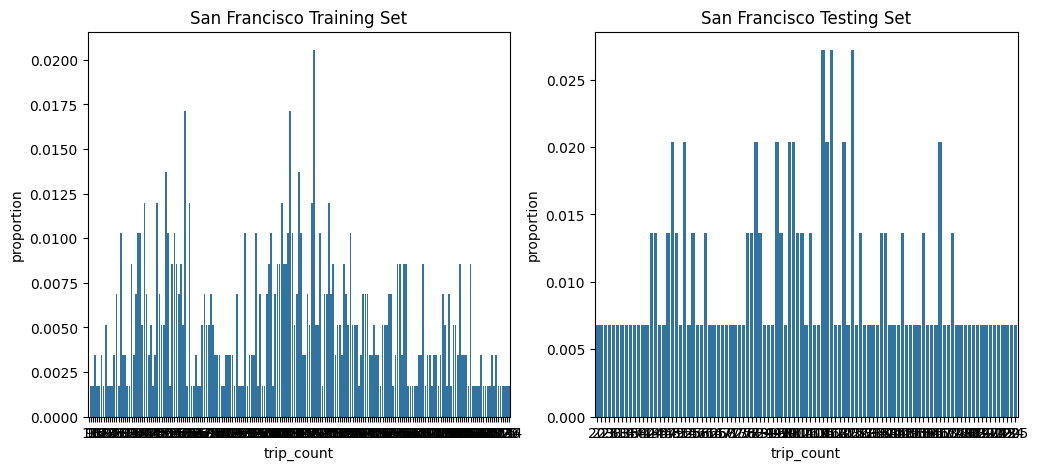

In [ ]:
# Check for class imbalance in the San Francisco dataset
check_class_imbalance(y_train_sf, y_test_sf, "San Francisco")

Class distribution in San Jose training set:
    trip_count  proportion
0            4    0.126786
1            6    0.103571
2            7    0.085714
3            2    0.085714
4            8    0.080357
5            5    0.075000
6            9    0.071429
7            3    0.064286
8           10    0.057143
9           12    0.051786
10           1    0.050000
11          11    0.048214
12          13    0.030357
13          14    0.025000
14          15    0.017857
15          16    0.016071
16          17    0.005357
17          18    0.001786
18          20    0.001786
19          31    0.001786
Class distribution in San Jose testing set:
    trip_count  proportion
0            4    0.121429
1            6    0.114286
2            9    0.114286
3            2    0.085714
4            3    0.085714
5            5    0.085714
6            7    0.085714
7            1    0.064286
8           10    0.064286
9            8    0.057143
10          12    0.057143
11          11    0.

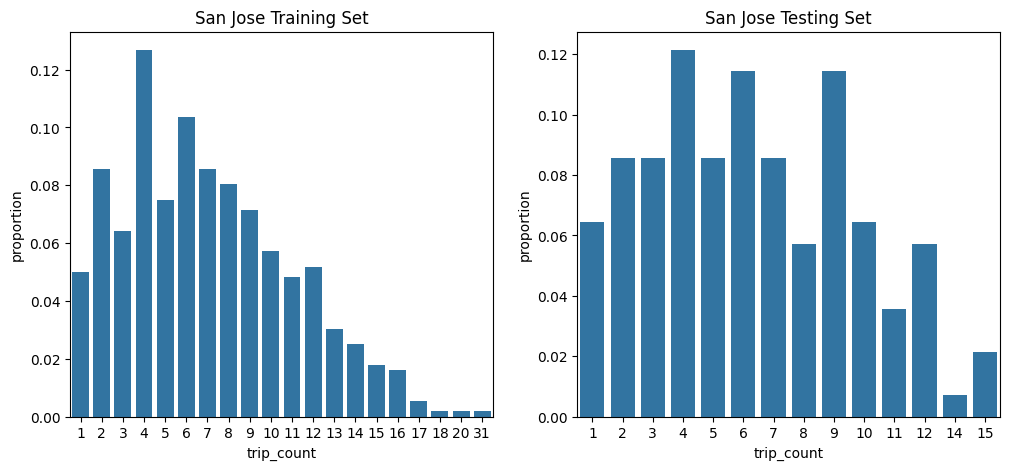

In [ ]:
# Check for class imbalance in the San Jose dataset
check_class_imbalance(y_train_sj, y_test_sj, "San Jose")

Class distribution in Mountain View training set:
    trip_count  proportion
0            9    0.076336
1            2    0.076336
2            8    0.070611
3           11    0.068702
4           13    0.064885
5           10    0.064885
6           12    0.061069
7            7    0.061069
8            1    0.057252
9            6    0.057252
10           4    0.055344
11           3    0.053435
12           5    0.051527
13          14    0.043893
14          15    0.038168
15          17    0.034351
16          16    0.024809
17          18    0.011450
18          20    0.011450
19          19    0.005725
20          22    0.005725
21          21    0.003817
22          23    0.001908
Class distribution in Mountain View testing set:
    trip_count  proportion
0           11    0.099237
1            3    0.083969
2            1    0.076336
3           13    0.068702
4            5    0.068702
5            7    0.068702
6            8    0.068702
7           18    0.053435
8         

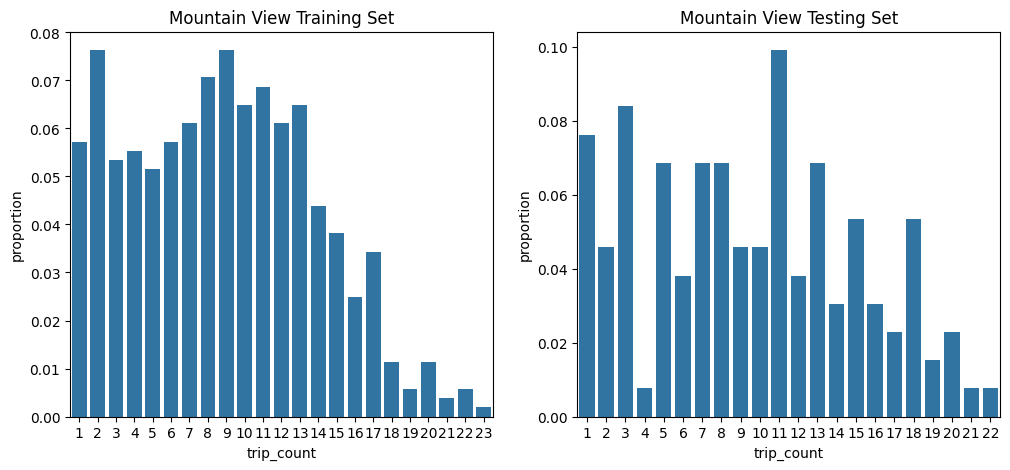

In [ ]:
# Check for class imbalance in the Mountain View Dataset
check_class_imbalance(y_train_mv, y_test_mv, "Mountain View")

Class distribution in Redwood City training set:
    trip_count  proportion
0            2    0.189931
1            1    0.180778
2            4    0.155606
3            3    0.137300
4            5    0.116705
5            6    0.082380
6            7    0.052632
7            8    0.036613
8            9    0.025172
9           10    0.013730
10          11    0.006865
11          16    0.002288
Class distribution in Redwood City testing set:
    trip_count  proportion
0            1    0.272727
1            4    0.190909
2            3    0.145455
3            2    0.136364
4            5    0.072727
5            6    0.063636
6            7    0.054545
7            8    0.018182
8            9    0.018182
9           10    0.009091
10          11    0.009091
11          13    0.009091


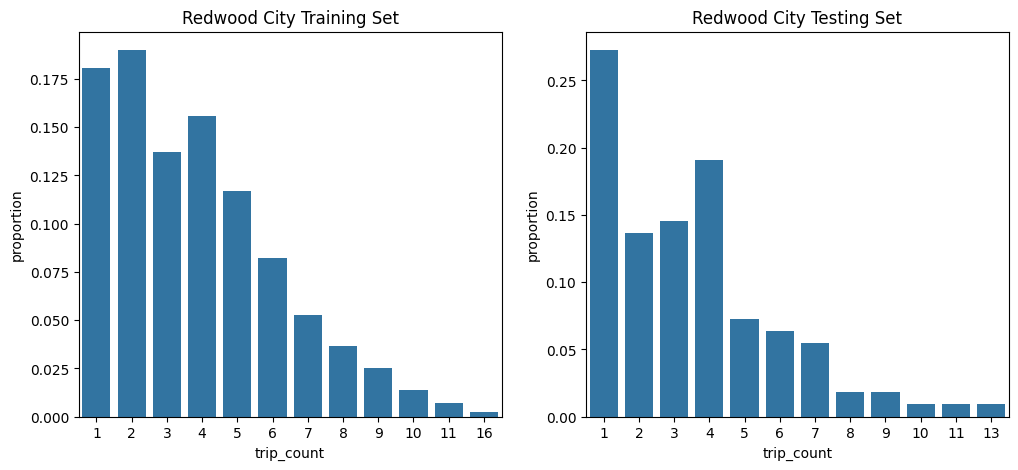

In [ ]:
# Check for class imbalance in the Redwood City dataset
check_class_imbalance(y_train_re, y_test_re, "Redwood City")

Class distribution in Palo Alto training set:
    trip_count  proportion
0            2    0.119231
1            5    0.103846
2            6    0.098077
3            9    0.092308
4            3    0.090385
5            4    0.088462
6            1    0.084615
7            7    0.082692
8            8    0.071154
9           10    0.051923
10          11    0.034615
11          12    0.032692
12          13    0.025000
13          15    0.011538
14          14    0.007692
15          16    0.003846
16          17    0.001923
Class distribution in Palo Alto testing set:
    trip_count  proportion
0            1    0.137405
1            4    0.122137
2            3    0.114504
3            2    0.106870
4            5    0.091603
5            8    0.083969
6           10    0.068702
7            7    0.061069
8            6    0.053435
9            9    0.045802
10          11    0.030534
11          12    0.030534
12          13    0.030534
13          14    0.007634
14          15    

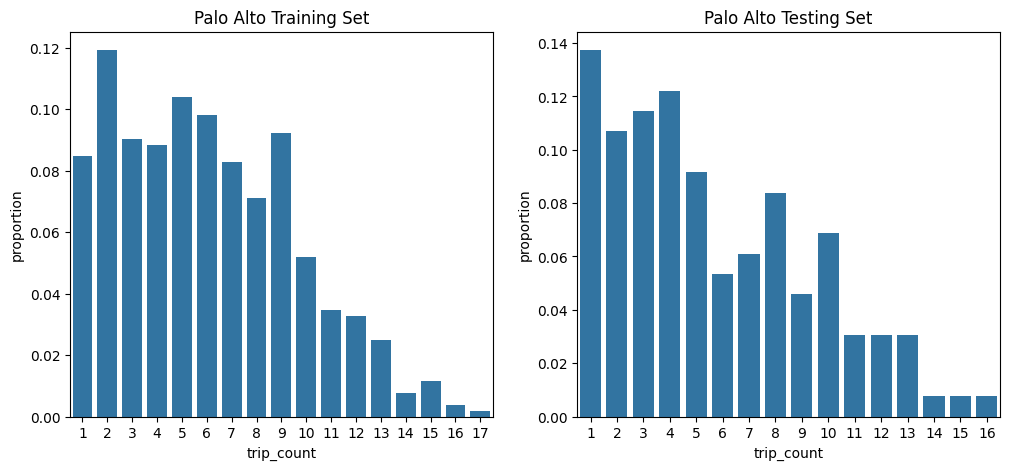

In [ ]:
# Check for class imbalance in the Palo Alto dataset
check_class_imbalance(y_train_pa, y_test_pa, "Palo Alto")

**SMOTE**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Function to apply RandomOverSampler and display class distribution
def apply_oversampler_and_display(X_train, y_train, y_test, dataset_name):
    try:
        # Ensure inputs are in the correct format
        if isinstance(X_train, pd.DataFrame):
            X_train = X_train.values
        if isinstance(y_train, pd.Series):
            y_train = y_train.values
        if isinstance(y_test, pd.Series):
            y_test = y_test.values

        # Debugging statements to check the types and shapes of inputs
        print(f"X_train type: {type(X_train)}, shape: {X_train.shape}")
        print(f"y_train type: {type(y_train)}, shape: {y_train.shape}")
        print(f"y_test type: {type(y_test)}, shape: {y_test.shape}")

        # Initialize RandomOverSampler
        ros = RandomOverSampler(random_state=42)

        # Fit and apply RandomOverSampler to the training data
        X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

        # Check the class distribution after resampling
        original_class_distribution = Counter(y_train)
        resampled_class_distribution = Counter(y_train_resampled)

        # Display the new class distribution
        def display_class_distribution(y_train_resampled, y_test, dataset_name):
            train_distribution = pd.Series(y_train_resampled).value_counts(normalize=True).reset_index()
            test_distribution = pd.Series(y_test).value_counts(normalize=True).reset_index()

            train_distribution.columns = ['trip_count', 'proportion']
            test_distribution.columns = ['trip_count', 'proportion']

            fig, ax = plt.subplots(1, 2, figsize=(12, 5))
            sns.barplot(x='trip_count', y='proportion', data=train_distribution, ax=ax[0])
            ax[0].set_title(f"{dataset_name} Training Set After Oversampling")
            sns.barplot(x='trip_count', y='proportion', data=test_distribution, ax=ax[1])
            ax[1].set_title(f"{dataset_name} Testing Set")
            plt.show()

        # Display the new class distribution
        display_class_distribution(y_train_resampled, y_test, dataset_name)

        print(f"Original class distribution for {dataset_name}: {original_class_distribution}")
        print(f"Resampled class distribution for {dataset_name}: {resampled_class_distribution}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example for San Francisco
apply_oversampler_and_display(X_train_sf, y_train_sf, y_test_sf, "San Francisco")

# Repeat for other datasets
apply_oversampler_and_display(X_train_pa, y_train_pa, y_test_pa, "Palo Alto")
apply_oversampler_and_display(X_train_re, y_train_re, y_test_re, "Redwood City")
apply_oversampler_and_display(X_train_mv, y_train_mv, y_test_mv, "Mountain View")
apply_oversampler_and_display(X_train_sj, y_train_sj, y_test_sj, "San Jose")


X_train type: <class 'numpy.ndarray'>, shape: (584, 29)
y_train type: <class 'pandas.core.frame.DataFrame'>, shape: (584, 1)
y_test type: <class 'pandas.core.frame.DataFrame'>, shape: (147, 1)
An error occurred: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
X_train type: <class 'numpy.ndarray'>, shape: (520, 29)
y_train type: <class 'pandas.core.frame.DataFrame'>, shape: (520, 1)
y_test type: <class 'pandas.core.frame.DataFrame'>, shape: (131, 1)
An error occurred: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
X_train type: <class 'numpy.ndarray'>, shape: (437, 29)
y_train type: <class 'pandas.core.frame.DataFrame'>, shape: (437, 1)
y_test type: <class 'pandas.core.frame.DataFrame'>, shape: (110, 1)
An error occurred: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
X_train type: <class 'numpy.ndarray'>, shape: (524, 29)
y_train type: 

X_train type: <class 'numpy.ndarray'>, shape: (584, 29)
y_train type: <class 'pandas.core.series.Series'>, shape: (584,)
y_test type: <class 'pandas.core.series.Series'>, shape: (147,)


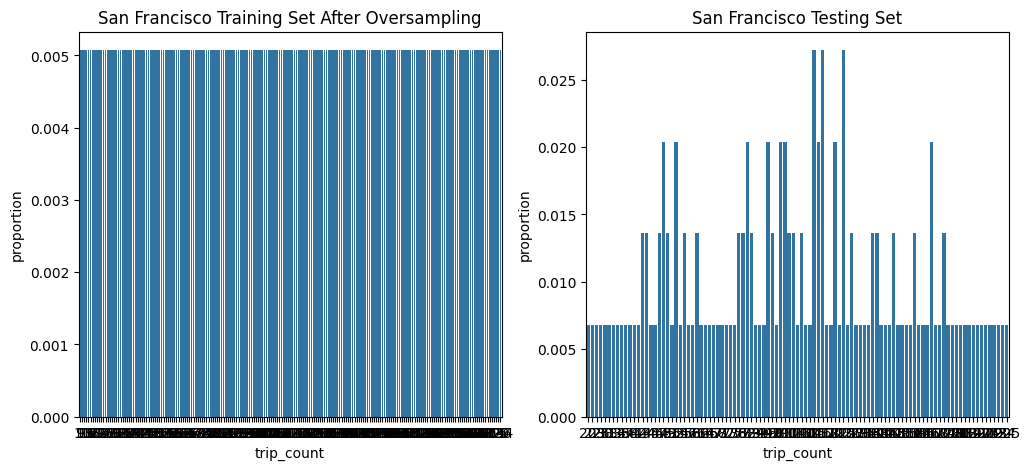

Original class distribution for San Francisco: Counter({121: 12, 110: 10, 59: 10, 50: 8, 114: 8, 46: 7, 61: 7, 40: 7, 106: 7, 120: 7, 128: 7, 54: 6, 109: 6, 101: 6, 124: 6, 37: 6, 94: 6, 115: 6, 89: 6, 138: 6, 51: 6, 29: 6, 111: 6, 38: 6, 53: 5, 34: 5, 130: 5, 108: 5, 161: 5, 164: 5, 198: 5, 193: 5, 163: 5, 105: 5, 100: 5, 107: 5, 104: 5, 172: 5, 135: 5, 55: 5, 57: 5, 160: 5, 145: 4, 103: 4, 136: 4, 56: 4, 68: 4, 85: 4, 27: 4, 36: 4, 73: 4, 118: 4, 181: 4, 156: 4, 96: 4, 99: 4, 144: 4, 157: 4, 47: 4, 129: 4, 127: 4, 113: 4, 126: 4, 185: 4, 41: 4, 146: 4, 133: 3, 21: 3, 139: 3, 112: 3, 58: 3, 149: 3, 123: 3, 188: 3, 67: 3, 71: 3, 43: 3, 140: 3, 74: 3, 119: 3, 153: 3, 137: 3, 132: 3, 49: 3, 187: 3, 154: 3, 69: 3, 155: 3, 182: 3, 39: 3, 48: 3, 141: 3, 122: 3, 210: 2, 117: 2, 35: 2, 134: 2, 131: 2, 116: 2, 151: 2, 82: 2, 64: 2, 159: 2, 212: 2, 162: 2, 31: 2, 9: 2, 195: 2, 30: 2, 204: 2, 81: 2, 170: 2, 150: 2, 175: 2, 80: 2, 26: 2, 76: 2, 189: 2, 75: 2, 83: 2, 177: 2, 42: 2, 178: 2, 171: 2,

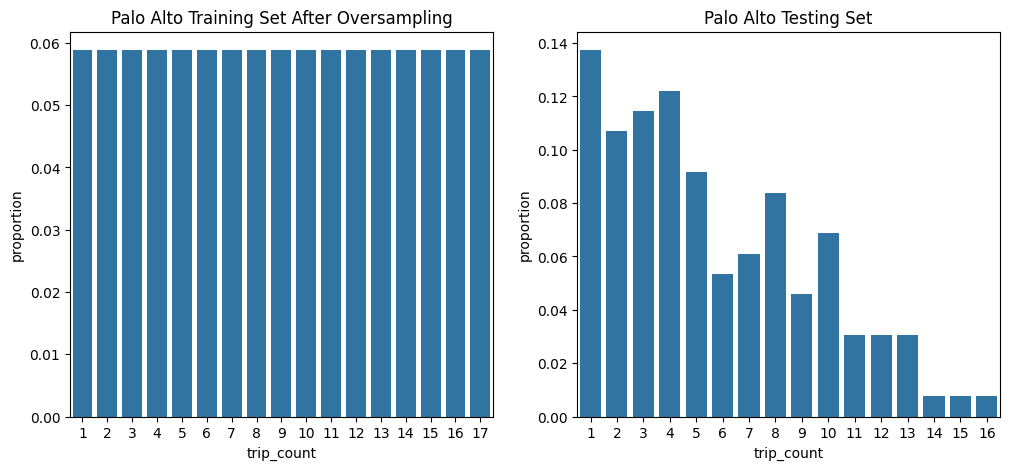

Original class distribution for Palo Alto: Counter({2: 62, 5: 54, 6: 51, 9: 48, 3: 47, 4: 46, 1: 44, 7: 43, 8: 37, 10: 27, 11: 18, 12: 17, 13: 13, 15: 6, 14: 4, 16: 2, 17: 1})
Resampled class distribution for Palo Alto: Counter({3: 62, 10: 62, 9: 62, 7: 62, 8: 62, 5: 62, 2: 62, 11: 62, 13: 62, 4: 62, 15: 62, 1: 62, 6: 62, 12: 62, 16: 62, 14: 62, 17: 62})
X_train type: <class 'numpy.ndarray'>, shape: (437, 29)
y_train type: <class 'pandas.core.series.Series'>, shape: (437,)
y_test type: <class 'pandas.core.series.Series'>, shape: (110,)


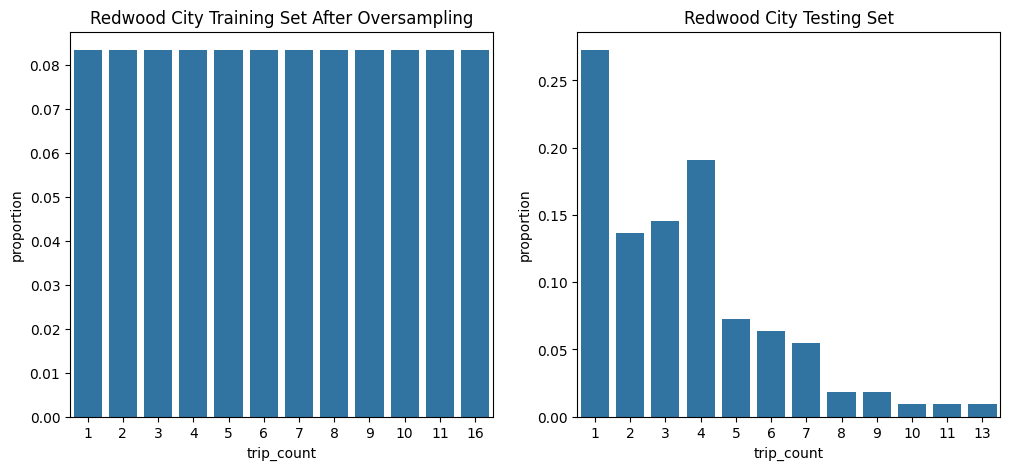

Original class distribution for Redwood City: Counter({2: 83, 1: 79, 4: 68, 3: 60, 5: 51, 6: 36, 7: 23, 8: 16, 9: 11, 10: 6, 11: 3, 16: 1})
Resampled class distribution for Redwood City: Counter({2: 83, 4: 83, 6: 83, 3: 83, 5: 83, 7: 83, 1: 83, 8: 83, 11: 83, 9: 83, 10: 83, 16: 83})
X_train type: <class 'numpy.ndarray'>, shape: (524, 29)
y_train type: <class 'pandas.core.series.Series'>, shape: (524,)
y_test type: <class 'pandas.core.series.Series'>, shape: (131,)


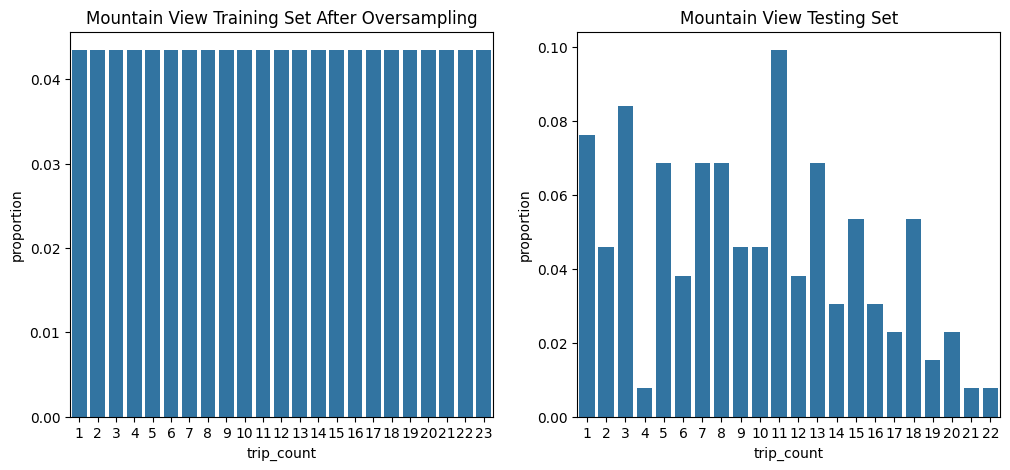

Original class distribution for Mountain View: Counter({2: 40, 9: 40, 8: 37, 11: 36, 10: 34, 13: 34, 7: 32, 12: 32, 1: 30, 6: 30, 4: 29, 3: 28, 5: 27, 14: 23, 15: 20, 17: 18, 16: 13, 18: 6, 20: 6, 19: 3, 22: 3, 21: 2, 23: 1})
Resampled class distribution for Mountain View: Counter({7: 40, 17: 40, 11: 40, 1: 40, 18: 40, 10: 40, 12: 40, 5: 40, 21: 40, 15: 40, 19: 40, 6: 40, 2: 40, 8: 40, 14: 40, 13: 40, 4: 40, 3: 40, 16: 40, 9: 40, 20: 40, 22: 40, 23: 40})
X_train type: <class 'numpy.ndarray'>, shape: (560, 29)
y_train type: <class 'pandas.core.series.Series'>, shape: (560,)
y_test type: <class 'pandas.core.series.Series'>, shape: (140,)


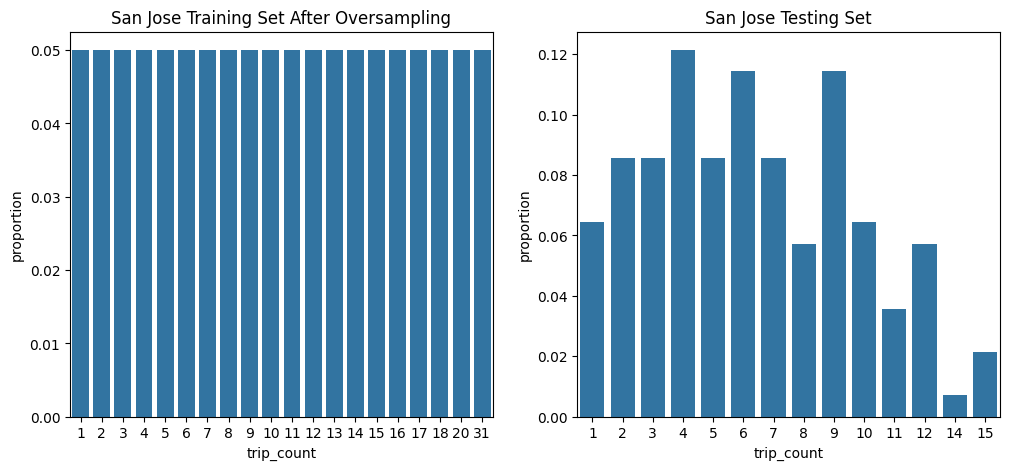

Original class distribution for San Jose: Counter({4: 71, 6: 58, 7: 48, 2: 48, 8: 45, 5: 42, 9: 40, 3: 36, 10: 32, 12: 29, 1: 28, 11: 27, 13: 17, 14: 14, 15: 10, 16: 9, 17: 3, 18: 1, 31: 1, 20: 1})
Resampled class distribution for San Jose: Counter({17: 71, 7: 71, 4: 71, 3: 71, 12: 71, 6: 71, 9: 71, 8: 71, 2: 71, 5: 71, 1: 71, 10: 71, 15: 71, 11: 71, 16: 71, 13: 71, 14: 71, 18: 71, 31: 71, 20: 71})


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Function to apply RandomOverSampler and display class distribution
def apply_oversampler_and_display(X_train, y_train, y_test, dataset_name):
    try:
        # Ensure inputs are in the correct format
        if isinstance(X_train, pd.DataFrame):
            X_train = X_train.values
        if isinstance(y_train, pd.DataFrame):
            y_train = y_train.squeeze()  # Convert DataFrame to Series
        if isinstance(y_test, pd.DataFrame):
            y_test = y_test.squeeze()  # Convert DataFrame to Series

        # Debugging statements to check the types and shapes of inputs
        print(f"X_train type: {type(X_train)}, shape: {X_train.shape}")
        print(f"y_train type: {type(y_train)}, shape: {y_train.shape}")
        print(f"y_test type: {type(y_test)}, shape: {y_test.shape}")

        # Initialize RandomOverSampler
        ros = RandomOverSampler(random_state=42)

        # Fit and apply RandomOverSampler to the training data
        X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

        # Check the class distribution after resampling
        original_class_distribution = Counter(y_train)
        resampled_class_distribution = Counter(y_train_resampled)

        # Display the new class distribution
        def display_class_distribution(y_train_resampled, y_test, dataset_name):
            train_distribution = pd.Series(y_train_resampled).value_counts(normalize=True).reset_index()
            test_distribution = pd.Series(y_test).value_counts(normalize=True).reset_index()

            train_distribution.columns = ['trip_count', 'proportion']
            test_distribution.columns = ['trip_count', 'proportion']

            fig, ax = plt.subplots(1, 2, figsize=(12, 5))
            sns.barplot(x='trip_count', y='proportion', data=train_distribution, ax=ax[0])
            ax[0].set_title(f"{dataset_name} Training Set After Oversampling")
            sns.barplot(x='trip_count', y='proportion', data=test_distribution, ax=ax[1])
            ax[1].set_title(f"{dataset_name} Testing Set")
            plt.show()

        # Display the new class distribution
        display_class_distribution(y_train_resampled, y_test, dataset_name)

        print(f"Original class distribution for {dataset_name}: {original_class_distribution}")
        print(f"Resampled class distribution for {dataset_name}: {resampled_class_distribution}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example for San Francisco
apply_oversampler_and_display(X_train_sf, y_train_sf, y_test_sf, "San Francisco")

# Repeat for other datasets
apply_oversampler_and_display(X_train_pa, y_train_pa, y_test_pa, "Palo Alto")
apply_oversampler_and_display(X_train_re, y_train_re, y_test_re, "Redwood City")
apply_oversampler_and_display(X_train_mv, y_train_mv, y_test_mv, "Mountain View")
apply_oversampler_and_display(X_train_sj, y_train_sj, y_test_sj, "San Jose")

In [ ]:
y_test_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 703 to 135
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   trip_count  147 non-null    int64
dtypes: int64(1)
memory usage: 2.3 KB


#### Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def scale_numerical_features(X_train, X_test, feature_names):
    scaler = MinMaxScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    X_train_scaled[feature_names] = scaler.fit_transform(X_train[feature_names])
    X_test_scaled[feature_names] = scaler.transform(X_test[feature_names])

    return X_train_scaled, X_test_scaled

# Identify numerical features for San Francisco
numerical_features_sf = X_train_sf.select_dtypes(include=['int64', 'float64']).columns

# Scale numerical features for San Francisco
X_train_sf_scaled, X_test_sf_scaled = scale_numerical_features(X_train_sf, X_test_sf, numerical_features_sf)

# Repeat for other datasets
numerical_features_pa = X_train_pa.select_dtypes(include=['int64', 'float64']).columns
X_train_pa_scaled, X_test_pa_scaled = scale_numerical_features(X_train_pa, X_test_pa, numerical_features_pa)

numerical_features_re = X_train_re.select_dtypes(include=['int64', 'float64']).columns
X_train_re_scaled, X_test_re_scaled = scale_numerical_features(X_train_re, X_test_re, numerical_features_re)

numerical_features_mv = X_train_mv.select_dtypes(include=['int64', 'float64']).columns
X_train_mv_scaled, X_test_mv_scaled = scale_numerical_features(X_train_mv, X_test_mv, numerical_features_mv)

numerical_features_sj = X_train_sj.select_dtypes(include=['int64', 'float64']).columns
X_train_sj_scaled, X_test_sj_scaled = scale_numerical_features(X_train_sj, X_test_sj, numerical_features_sj)

# Debugging: Check the scaling results
print(X_train_sf_scaled.head())
print(X_test_sf_scaled.head())

     max_temperature_f  mean_temperature_f  min_temperature_f  \
682           0.586957            0.714286           0.848485   
250           0.195652            0.314286           0.515152   
336           0.543478            0.514286           0.484848   
260           0.347826            0.428571           0.545455   
543           0.673913            0.742857           0.787879   

     max_dew_point_f  mean_dew_point_f  min_dew_point_f  max_humidity  \
682         0.769231          0.866667         0.909091      0.750000   
250         0.615385          0.711111         0.781818      1.000000   
336         0.666667          0.733333         0.745455      0.890625   
260         0.692308          0.666667         0.636364      0.890625   
543         0.743590          0.822222         0.872727      0.687500   

     mean_humidity  min_humidity  max_sea_level_pressure_inches  ...  \
682       0.641791      0.547945                       0.220779  ...   
250       0.985075      0.

In [ ]:
y_test_re.shape

(110, 1)

Random Forest Regressor

**BEFORE TUNING**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Function to train and evaluate Random Forest Regressor
def train_and_evaluate_rf(X_train_scaled, y_train, dataset_name):
    # Split data into training and validation sets
    X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

    # Initialize the model
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    rf_regressor.fit(X_train_final, y_train_final)

    # Predict on the validation set
    y_val_pred = rf_regressor.predict(X_val)

    # Calculate performance metrics
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_val_pred)

    print(f"{dataset_name} Validation MSE: {mse:.2f}")
    print(f"{dataset_name} Validation RMSE: {rmse:.2f}")
    print(f"{dataset_name} Validation R^2: {r2:.4f}")

# Example usage
# Assuming X_train_sf_scaled, y_train_sf, X_train_pa_scaled, y_train_pa, etc. are already defined and preprocessed
train_and_evaluate_rf(X_train_sf_scaled, y_train_sf, "San Francisco")
train_and_evaluate_rf(X_train_pa_scaled, y_train_pa, "Palo Alto")
train_and_evaluate_rf(X_train_re_scaled, y_train_re, "Redwood City")
train_and_evaluate_rf(X_train_mv_scaled, y_train_mv, "Mountain View")
train_and_evaluate_rf(X_train_sj_scaled, y_train_sj, "San Jose")

<ipython-input-68-6a823a64af78>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train_final, y_train_final)


San Francisco Validation MSE: 1020.55
San Francisco Validation RMSE: 31.95
San Francisco Validation R^2: 0.6512


<ipython-input-68-6a823a64af78>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train_final, y_train_final)


Palo Alto Validation MSE: 11.12
Palo Alto Validation RMSE: 3.33
Palo Alto Validation R^2: 0.2184


<ipython-input-68-6a823a64af78>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train_final, y_train_final)


Redwood City Validation MSE: 4.78
Redwood City Validation RMSE: 2.19
Redwood City Validation R^2: 0.0304


<ipython-input-68-6a823a64af78>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train_final, y_train_final)


Mountain View Validation MSE: 14.97
Mountain View Validation RMSE: 3.87
Mountain View Validation R^2: 0.3988


<ipython-input-68-6a823a64af78>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train_final, y_train_final)


San Jose Validation MSE: 13.83
San Jose Validation RMSE: 3.72
San Jose Validation R^2: 0.1885


| Dataset        | Validation MSE | Validation RMSE | Validation R² |
|----------------|----------------|-----------------|---------------|
| San Francisco  | 1020.55        | 31.95           | 0.651         |
| Palo Alto      | 11.12          | 3.33            | 0.218         |
| Redwood City   | 4.78           | 2.19            | 0.030         |
| Mountain View  | 14.97          | 3.87            | 0.399         |
| San Jose       | 13.83          | 3.72            | 0.188         |


***Analysis***

**San Francisco** has the highest MSE and RMSE but also the highest R², indicating the model explains a good proportion of variance despite the higher error.

**Palo Alto** and **San Jose** have moderate performance with MSE and RMSE, but lower R².

**Redwood City** shows the lowest MSE and RMSE, but also the lowest R², suggesting the model is not effectively capturing the variance in the data.

**Mountain View** has a balanced performance with moderate MSE, RMSE, and R².

**AFTER TUNING1** bayesian-optimization for Random Forest

In [ ]:
pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
from skopt import gp_minimize
from skopt.space import Integer, Real
from skopt.utils import use_named_args

In [ ]:
from skopt import gp_minimize
from skopt.space import Integer, Real
from skopt.utils import use_named_args
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Define the parameter space
param_space = [
    Integer(10, 300, name='n_estimators'),
    Real(0.1, 0.9, name='max_features'),
    Integer(5, 50, name='max_depth'),
    Integer(2, 10, name='min_samples_split'),
    Integer(1, 10, name='min_samples_leaf')
]

# Function to perform Bayesian optimization and evaluate the model
def optimize_and_evaluate(X_train_scaled, y_train, dataset_name):
    # Split data into training and validation sets
    X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

    # Define the objective function
    @use_named_args(param_space)
    def rf_cv(n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf):
        # Initialize the model with given hyperparameters
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_features=max_features,
            max_depth=int(max_depth),
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            random_state=42
        )

        # Train the model
        model.fit(X_train_final, y_train_final)

        # Predict on the validation set
        y_val_pred = model.predict(X_val)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        return rmse

    # Perform Bayesian Optimization
    res = gp_minimize(
        rf_cv,
        param_space,
        n_calls=30,
        random_state=42,
        verbose=2
    )

    # Extract the best parameters
    best_params = res.x
    best_params_dict = {
        'n_estimators': best_params[0],
        'max_features': best_params[1],
        'max_depth': best_params[2],
        'min_samples_split': best_params[3],
        'min_samples_leaf': best_params[4]
    }

    # Train the final model with best parameters
    best_rf_model = RandomForestRegressor(
        n_estimators=best_params_dict['n_estimators'],
        max_features=best_params_dict['max_features'],
        max_depth=best_params_dict['max_depth'],
        min_samples_split=best_params_dict['min_samples_split'],
        min_samples_leaf=best_params_dict['min_samples_leaf'],
        random_state=42
    )

    best_rf_model.fit(X_train_final, y_train_final)

    # Evaluate the final model
    y_val_pred = best_rf_model.predict(X_val)
    final_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    final_mse = mean_squared_error(y_val, y_val_pred)
    final_r2 = r2_score(y_val, y_val_pred)

    print(f"{dataset_name} - Final Validation RMSE: {final_rmse}")
    print(f"{dataset_name} - Final Validation MSE: {final_mse}")
    print(f"{dataset_name} - Final Validation R²: {final_r2}")

    return best_params_dict, final_rmse, final_mse, final_r2

# Example datasets (replace these with your actual data)
datasets = {
    "San Francisco": (X_train_sf_scaled, y_train_sf),
    "Palo Alto": (X_train_pa_scaled, y_train_pa),
    "Redwood City": (X_train_re_scaled, y_train_re),
    "Mountain View": (X_train_mv_scaled, y_train_mv),
    "San Jose": (X_train_sj_scaled, y_train_sj)
}

# Dictionary to store results
results = {}

# Perform optimization and evaluation for each dataset
for city, (X_train_scaled, y_train) in datasets.items():
    print(f"Processing {city}...")
    best_params, rmse, mse, r2 = optimize_and_evaluate(X_train_scaled, y_train, city)
    results[city] = {
        "Best Params": best_params,
        "RMSE": rmse,
        "MSE": mse,
        "R²": r2
    }

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

Processing San Francisco...
Iteration No: 1 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.9544
Function value obtained: 33.2760
Current minimum: 33.2760
Iteration No: 2 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.4686
Function value obtained: 33.2203
Current minimum: 33.2203
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1701
Function value obtained: 33.9960
Current minimum: 33.2203
Iteration No: 4 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.9143
Function value obtained: 33.2891
Current minimum: 33.2203
Iteration No: 5 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.6318
Function value obtained: 35.5965
Current minimum: 33.2203
Iteration No: 6 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 6 ended. Evaluation done at random point.
Time taken: 0.9255
Function value obtained: 33.1566
Current minimum: 33.1566
Iteration No: 7 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 7 ended. Evaluation done at random point.
Time taken: 0.9019
Function value obtained: 33.0980
Current minimum: 33.0980
Iteration No: 8 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 8 ended. Evaluation done at random point.
Time taken: 0.5392
Function value obtained: 40.8488
Current minimum: 33.0980
Iteration No: 9 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 9 ended. Evaluation done at random point.
Time taken: 1.2232
Function value obtained: 31.7166
Current minimum: 31.7166
Iteration No: 10 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 2.4324
Function value obtained: 31.3146
Current minimum: 31.3146
Iteration No: 11 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 2.1406
Function value obtained: 30.9200
Current minimum: 30.9200
Iteration No: 12 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 2.2641
Function value obtained: 35.3018
Current minimum: 30.9200
Iteration No: 13 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 3.2228
Function value obtained: 30.6599
Current minimum: 30.6599
Iteration No: 14 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 1.6490
Function value obtained: 32.6508
Current minimum: 30.6599
Iteration No: 15 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 3.1734
Function value obtained: 31.6307
Current minimum: 30.6599
Iteration No: 16 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 1.9248
Function value obtained: 30.8694
Current minimum: 30.6599
Iteration No: 17 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 2.7372
Function value obtained: 31.5561
Current minimum: 30.6599
Iteration No: 18 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 4.8224
Function value obtained: 30.6526
Current minimum: 30.6526
Iteration No: 19 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 1.7511
Function value obtained: 32.5540
Current minimum: 30.6526
Iteration No: 20 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 2.8678
Function value obtained: 31.0081
Current minimum: 30.6526
Iteration No: 21 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 1.6015
Function value obtained: 30.6441
Current minimum: 30.6441
Iteration No: 22 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 1.6512
Function value obtained: 30.6671
Current minimum: 30.6441
Iteration No: 23 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 0.7930
Function value obtained: 31.1601
Current minimum: 30.6441
Iteration No: 24 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 2.2993
Function value obtained: 30.6441
Current minimum: 30.6441
Iteration No: 25 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 2.4202
Function value obtained: 30.9610
Current minimum: 30.6441
Iteration No: 26 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 1.4731
Function value obtained: 33.1647
Current minimum: 30.6441
Iteration No: 27 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 1.7279
Function value obtained: 31.0048
Current minimum: 30.6441
Iteration No: 28 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 1.9028
Function value obtained: 30.6441
Current minimum: 30.6441
Iteration No: 29 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 1.7200
Function value obtained: 30.8778
Current minimum: 30.6441
Iteration No: 30 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 1.7493
Function value obtained: 30.6441
Current minimum: 30.6441


<ipython-input-72-989459526e0c>:75: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf_model.fit(X_train_final, y_train_final)


San Francisco - Final Validation RMSE: 30.64410107466467
San Francisco - Final Validation MSE: 939.0609306742643
San Francisco - Final Validation R²: 0.6790119130211221
Processing Palo Alto...
Iteration No: 1 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.7094
Function value obtained: 3.2846
Current minimum: 3.2846
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1310
Function value obtained: 3.2170
Current minimum: 3.2170
Iteration No: 3 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1241
Function value obtained: 3.2275
Current minimum: 3.2170
Iteration No: 4 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.6397
Function value obtained: 3.2232
Current minimum: 3.2170
Iteration No: 5 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.3684
Function value obtained: 3.3685
Current minimum: 3.2170
Iteration No: 6 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 6 ended. Evaluation done at random point.
Time taken: 0.6010
Function value obtained: 3.2633
Current minimum: 3.2170
Iteration No: 7 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 7 ended. Evaluation done at random point.
Time taken: 0.6510
Function value obtained: 3.2325
Current minimum: 3.2170
Iteration No: 8 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 8 ended. Evaluation done at random point.
Time taken: 0.3101
Function value obtained: 3.4742
Current minimum: 3.2170
Iteration No: 9 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 9 ended. Evaluation done at random point.
Time taken: 0.6432
Function value obtained: 3.2543
Current minimum: 3.2170
Iteration No: 10 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 1.0598
Function value obtained: 3.2862
Current minimum: 3.2170
Iteration No: 11 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 0.4371
Function value obtained: 3.2279
Current minimum: 3.2170
Iteration No: 12 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 0.5831
Function value obtained: 3.1417
Current minimum: 3.1417
Iteration No: 13 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 1.2854
Function value obtained: 3.1882
Current minimum: 3.1417
Iteration No: 14 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.6399
Function value obtained: 3.3755
Current minimum: 3.1417
Iteration No: 15 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 0.7215
Function value obtained: 3.2239
Current minimum: 3.1417
Iteration No: 16 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 0.9792
Function value obtained: 3.2736
Current minimum: 3.1417
Iteration No: 17 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 1.5034
Function value obtained: 3.2009
Current minimum: 3.1417
Iteration No: 18 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 0.8401
Function value obtained: 3.2334
Current minimum: 3.1417
Iteration No: 19 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 0.7234
Function value obtained: 3.2065
Current minimum: 3.1417
Iteration No: 20 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 1.2480
Function value obtained: 3.2266
Current minimum: 3.1417
Iteration No: 21 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 2.0262
Function value obtained: 3.1946
Current minimum: 3.1417
Iteration No: 22 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 0.9933
Function value obtained: 3.2913
Current minimum: 3.1417
Iteration No: 23 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 0.7592
Function value obtained: 3.1891
Current minimum: 3.1417
Iteration No: 24 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 0.6306
Function value obtained: 3.3291
Current minimum: 3.1417
Iteration No: 25 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 0.7239
Function value obtained: 3.2431
Current minimum: 3.1417
Iteration No: 26 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 0.8843
Function value obtained: 3.1875
Current minimum: 3.1417
Iteration No: 27 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 1.1270
Function value obtained: 3.1620
Current minimum: 3.1417
Iteration No: 28 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 0.5927
Function value obtained: 3.2132
Current minimum: 3.1417
Iteration No: 29 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 1.1389
Function value obtained: 3.1920
Current minimum: 3.1417
Iteration No: 30 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 1.2481
Function value obtained: 3.1882
Current minimum: 3.1417
Palo Alto - Final Validation RMSE: 3.141713497340314
Palo Alto - Final Validation MSE: 9.870363699370309
Palo Alto - Final Validation R²: 0.3061138489331562
Processing Redwood City...
Iteration No: 1 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:75: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf_model.fit(X_train_final, y_train_final)
<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.4591
Function value obtained: 2.0919
Current minimum: 2.0919
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0927
Function value obtained: 2.0831
Current minimum: 2.0831
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0737
Function value obtained: 2.1841
Current minimum: 2.0831
Iteration No: 4 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.4001
Function value obtained: 2.0941
Current minimum: 2.0831
Iteration No: 5 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.2332
Function value obtained: 2.1075
Current minimum: 2.0831
Iteration No: 6 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 6 ended. Evaluation done at random point.
Time taken: 0.3751
Function value obtained: 2.1089
Current minimum: 2.0831
Iteration No: 7 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 7 ended. Evaluation done at random point.
Time taken: 0.3972
Function value obtained: 2.0980
Current minimum: 2.0831
Iteration No: 8 started. Evaluating function at random point.
Iteration No: 8 ended. Evaluation done at random point.
Time taken: 0.1907
Function value obtained: 2.1244
Current minimum: 2.0831
Iteration No: 9 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 9 ended. Evaluation done at random point.
Time taken: 0.5484
Function value obtained: 2.1118
Current minimum: 2.0831
Iteration No: 10 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 1.7072
Function value obtained: 2.1303
Current minimum: 2.0831
Iteration No: 11 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 0.7991
Function value obtained: 2.1349
Current minimum: 2.0831
Iteration No: 12 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 1.4739
Function value obtained: 2.1039
Current minimum: 2.0831
Iteration No: 13 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 0.7046
Function value obtained: 2.2506
Current minimum: 2.0831
Iteration No: 14 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.5671
Function value obtained: 2.1831
Current minimum: 2.0831
Iteration No: 15 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 0.7098
Function value obtained: 2.1083
Current minimum: 2.0831
Iteration No: 16 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 0.6450
Function value obtained: 2.0669
Current minimum: 2.0669
Iteration No: 17 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 0.7966
Function value obtained: 2.0624
Current minimum: 2.0624
Iteration No: 18 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 0.6461
Function value obtained: 2.0581
Current minimum: 2.0581
Iteration No: 19 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 0.7162
Function value obtained: 2.0939
Current minimum: 2.0581
Iteration No: 20 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 0.7074
Function value obtained: 2.0562
Current minimum: 2.0562
Iteration No: 21 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 0.9058
Function value obtained: 2.1027
Current minimum: 2.0562
Iteration No: 22 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 1.2309
Function value obtained: 2.0799
Current minimum: 2.0562
Iteration No: 23 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 0.6915
Function value obtained: 2.0585
Current minimum: 2.0562
Iteration No: 24 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 1.1332
Function value obtained: 2.0788
Current minimum: 2.0562
Iteration No: 25 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 1.4530
Function value obtained: 2.0927
Current minimum: 2.0562
Iteration No: 26 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 1.8725
Function value obtained: 2.0892
Current minimum: 2.0562
Iteration No: 27 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 1.9826
Function value obtained: 2.1510
Current minimum: 2.0562
Iteration No: 28 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 0.9850
Function value obtained: 2.1570
Current minimum: 2.0562
Iteration No: 29 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 1.4122
Function value obtained: 2.0884
Current minimum: 2.0562
Iteration No: 30 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 1.1509
Function value obtained: 2.1255
Current minimum: 2.0562
Redwood City - Final Validation RMSE: 2.0562463744169204
Redwood City - Final Validation MSE: 4.228149152302731
Redwood City - Final Validation R²: 0.1426569863205377
Processing Mountain View...
Iteration No: 1 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:75: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf_model.fit(X_train_final, y_train_final)
<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.4647
Function value obtained: 3.9612
Current minimum: 3.9612
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0953
Function value obtained: 3.9263
Current minimum: 3.9263
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0671
Function value obtained: 4.0036
Current minimum: 3.9263
Iteration No: 4 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.4005
Function value obtained: 3.9246
Current minimum: 3.9246
Iteration No: 5 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.2379
Function value obtained: 4.0899
Current minimum: 3.9246
Iteration No: 6 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 6 ended. Evaluation done at random point.
Time taken: 0.3801
Function value obtained: 3.9474
Current minimum: 3.9246
Iteration No: 7 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 7 ended. Evaluation done at random point.
Time taken: 0.4239
Function value obtained: 3.9208
Current minimum: 3.9208
Iteration No: 8 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 8 ended. Evaluation done at random point.
Time taken: 0.2139
Function value obtained: 4.3106
Current minimum: 3.9208
Iteration No: 9 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 9 ended. Evaluation done at random point.
Time taken: 0.6328
Function value obtained: 3.8595
Current minimum: 3.8595
Iteration No: 10 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 1.2096
Function value obtained: 3.8814
Current minimum: 3.8595
Iteration No: 11 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 1.0562
Function value obtained: 3.8801
Current minimum: 3.8595
Iteration No: 12 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 1.9896
Function value obtained: 3.9043
Current minimum: 3.8595
Iteration No: 13 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 2.0841
Function value obtained: 3.9123
Current minimum: 3.8595
Iteration No: 14 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.5134
Function value obtained: 4.2384
Current minimum: 3.8595
Iteration No: 15 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 0.7563
Function value obtained: 4.0872
Current minimum: 3.8595
Iteration No: 16 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 0.6085
Function value obtained: 4.0391
Current minimum: 3.8595
Iteration No: 17 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 1.1423
Function value obtained: 3.9308
Current minimum: 3.8595
Iteration No: 18 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 1.4133
Function value obtained: 3.9404
Current minimum: 3.8595
Iteration No: 19 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 1.0547
Function value obtained: 3.9052
Current minimum: 3.8595
Iteration No: 20 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 1.0825
Function value obtained: 3.8944
Current minimum: 3.8595
Iteration No: 21 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 0.9989
Function value obtained: 3.8711
Current minimum: 3.8595
Iteration No: 22 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 0.5333
Function value obtained: 4.0255
Current minimum: 3.8595
Iteration No: 23 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 1.2409
Function value obtained: 3.9064
Current minimum: 3.8595
Iteration No: 24 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 0.9364
Function value obtained: 3.8934
Current minimum: 3.8595
Iteration No: 25 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 1.7144
Function value obtained: 3.8531
Current minimum: 3.8531
Iteration No: 26 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 2.0587
Function value obtained: 3.8952
Current minimum: 3.8531
Iteration No: 27 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 1.0781
Function value obtained: 3.9170
Current minimum: 3.8531
Iteration No: 28 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 0.8189
Function value obtained: 4.2995
Current minimum: 3.8531
Iteration No: 29 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 1.0808
Function value obtained: 3.9418
Current minimum: 3.8531
Iteration No: 30 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 1.2077
Function value obtained: 3.8751
Current minimum: 3.8531


<ipython-input-72-989459526e0c>:75: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf_model.fit(X_train_final, y_train_final)


Mountain View - Final Validation RMSE: 3.8530874592811033
Mountain View - Final Validation MSE: 14.846282968869307
Mountain View - Final Validation R²: 0.4037018305253153
Processing San Jose...
Iteration No: 1 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.4955
Function value obtained: 3.7084
Current minimum: 3.7084
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1025
Function value obtained: 3.6776
Current minimum: 3.6776
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0735
Function value obtained: 3.6937
Current minimum: 3.6776
Iteration No: 4 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 4 ended. Evaluation done at random point.
Time taken: 1.0904
Function value obtained: 3.6355
Current minimum: 3.6355
Iteration No: 5 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.2347
Function value obtained: 3.7188
Current minimum: 3.6355
Iteration No: 6 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 6 ended. Evaluation done at random point.
Time taken: 0.3978
Function value obtained: 3.6565
Current minimum: 3.6355
Iteration No: 7 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 7 ended. Evaluation done at random point.
Time taken: 0.4392
Function value obtained: 3.6312
Current minimum: 3.6312
Iteration No: 8 started. Evaluating function at random point.
Iteration No: 8 ended. Evaluation done at random point.
Time taken: 0.1974
Function value obtained: 3.7805
Current minimum: 3.6312

<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)



Iteration No: 9 started. Evaluating function at random point.
Iteration No: 9 ended. Evaluation done at random point.
Time taken: 0.6368
Function value obtained: 3.6603
Current minimum: 3.6312
Iteration No: 10 started. Evaluating function at random point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 1.3565
Function value obtained: 3.6408
Current minimum: 3.6312
Iteration No: 11 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 1.4276
Function value obtained: 3.6298
Current minimum: 3.6298
Iteration No: 12 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 2.1648
Function value obtained: 3.6511
Current minimum: 3.6298
Iteration No: 13 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 1.2462
Function value obtained: 3.6360
Current minimum: 3.6298
Iteration No: 14 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 1.1817
Function value obtained: 3.6211
Current minimum: 3.6211
Iteration No: 15 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 1.3101
Function value obtained: 3.6393
Current minimum: 3.6211
Iteration No: 16 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 2.0064
Function value obtained: 3.6519
Current minimum: 3.6211
Iteration No: 17 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 1.9147
Function value obtained: 3.6219
Current minimum: 3.6211
Iteration No: 18 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 1.3631
Function value obtained: 3.6203
Current minimum: 3.6203
Iteration No: 19 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 0.5873
Function value obtained: 3.6824
Current minimum: 3.6203
Iteration No: 20 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 2.3410
Function value obtained: 3.6917
Current minimum: 3.6203
Iteration No: 21 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 2.0190
Function value obtained: 3.6158
Current minimum: 3.6158
Iteration No: 22 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 1.5115
Function value obtained: 3.6956
Current minimum: 3.6158
Iteration No: 23 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 1.6591
Function value obtained: 3.6925
Current minimum: 3.6158
Iteration No: 24 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 1.2455
Function value obtained: 3.6400
Current minimum: 3.6158
Iteration No: 25 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 1.3428
Function value obtained: 3.6187
Current minimum: 3.6158
Iteration No: 26 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 0.6983
Function value obtained: 3.8122
Current minimum: 3.6158
Iteration No: 27 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 1.9144
Function value obtained: 3.7166
Current minimum: 3.6158
Iteration No: 28 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 1.5756
Function value obtained: 3.6384
Current minimum: 3.6158
Iteration No: 29 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 1.0372
Function value obtained: 3.7604
Current minimum: 3.6158
Iteration No: 30 started. Searching for the next optimal point.


<ipython-input-72-989459526e0c>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 2.0830
Function value obtained: 3.7216
Current minimum: 3.6158


<ipython-input-72-989459526e0c>:75: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf_model.fit(X_train_final, y_train_final)


San Jose - Final Validation RMSE: 3.6158036695487428
San Jose - Final Validation MSE: 13.074036176722155
San Jose - Final Validation R²: 0.23294976403577672
                                                     Best Params       RMSE  \
San Francisco  {'n_estimators': 300, 'max_features': 0.475870...  30.644101   
Palo Alto      {'n_estimators': 11, 'max_features': 0.9, 'max...   3.141713   
Redwood City   {'n_estimators': 46, 'max_features': 0.9, 'max...   2.056246   
Mountain View  {'n_estimators': 163, 'max_features': 0.836850...   3.853087   
San Jose       {'n_estimators': 300, 'max_features': 0.799077...   3.615804   

                      MSE        R²  
San Francisco  939.060931  0.679012  
Palo Alto        9.870364  0.306114  
Redwood City     4.228149  0.142657  
Mountain View   14.846283  0.403702  
San Jose        13.074036   0.23295  


| Dataset        | MSE        | R²       |
|----------------|------------|----------|
| San Francisco  | 939.060931 | 0.679012 |
| Palo Alto      | 9.870364   | 0.306114 |
| Redwood City   | 4.228149   | 0.142657 |
| Mountain View  | 14.846283  | 0.403702 |
| San Jose       | 13.074036  | 0.23295  |


In [ ]:
# Function to train the final model with the best parameters
def train_final_model(X_train, y_train, best_params_dict):
    final_rf_model = RandomForestRegressor(
        n_estimators=best_params_dict['n_estimators'],
        max_features=best_params_dict['max_features'],
        max_depth=best_params_dict['max_depth'],
        min_samples_split=best_params_dict['min_samples_split'],
        min_samples_leaf=best_params_dict['min_samples_leaf'],
        random_state=42
    )
    final_rf_model.fit(X_train, y_train)
    return final_rf_model

# Dictionary to store final models
final_models = {}

# Train the final models for each dataset
for city, (X_train_scaled, y_train) in datasets.items():
    best_params = results[city]["Best Params"]
    final_model = train_final_model(X_train_scaled, y_train, best_params)
    final_models[city] = final_model

<ipython-input-73-6757d5e139f2>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_rf_model.fit(X_train, y_train)
<ipython-input-73-6757d5e139f2>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_rf_model.fit(X_train, y_train)
<ipython-input-73-6757d5e139f2>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_rf_model.fit(X_train, y_train)
<ipython-input-73-6757d5e139f2>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_rf_model.fit(X_train, y_train)
<ipython-input-73-6757d5e139f2>:11: DataConversionWarning: A column-vector y was

In [ ]:
import pickle

# Save the final models to pickle files
for city, model in final_models.items():
    filename = f"{city.replace(' ', '_').lower()}_RFR_final_model.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model for {city} saved as {filename}")

# Assuming you have X_test and y_test for each city
test_datasets = {
    "San Francisco": (X_test_sf_scaled, y_test_sf),
    "Palo Alto": (X_test_pa_scaled, y_test_pa),
    "Redwood City": (X_test_re_scaled, y_test_re),
    "Mountain View": (X_test_mv_scaled, y_test_mv),
    "San Jose": (X_test_sj_scaled, y_test_sj)
}

# Evaluate the final models on the test sets
for city, (X_test_scaled, y_test) in test_datasets.items():
    model = final_models[city]
    y_test_pred = model.predict(X_test_scaled)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"{city} - Test RMSE: {test_rmse}")
    print(f"{city} - Test MSE: {test_mse}")
    print(f"{city} - Test R²: {test_r2}")

    # Save predictions for later use or analysis
    predictions_filename = f"{city.replace(' ', '_').lower()}_test_predictions.pkl"
    with open(predictions_filename, 'wb') as file:
        pickle.dump(y_test_pred, file)
    print(f"Predictions for {city} saved as {predictions_filename}")

Model for San Francisco saved as san_francisco_RFR_final_model.pkl
Model for Palo Alto saved as palo_alto_RFR_final_model.pkl
Model for Redwood City saved as redwood_city_RFR_final_model.pkl
Model for Mountain View saved as mountain_view_RFR_final_model.pkl
Model for San Jose saved as san_jose_RFR_final_model.pkl
San Francisco - Test RMSE: 30.778469198664705
San Francisco - Test MSE: 947.3141662131519
San Francisco - Test R²: 0.6253160835080931
Predictions for San Francisco saved as san_francisco_test_predictions.pkl
Palo Alto - Test RMSE: 3.1329450441554676
Palo Alto - Test MSE: 9.815344649698305
Palo Alto - Test R²: 0.2854064656897597
Predictions for Palo Alto saved as palo_alto_test_predictions.pkl
Redwood City - Test RMSE: 2.2842538452400794
Redwood City - Test MSE: 5.217815629494088
Redwood City - Test R²: 0.1243818773316534
Predictions for Redwood City saved as redwood_city_test_predictions.pkl
Mountain View - Test RMSE: 4.31743233813148
Mountain View - Test MSE: 18.6402219943434

| Dataset        | Test RMSE | Test MSE | Test R² |
|----------------|-----------|----------|---------|
| San Francisco  |   30.78   |  947.31  |  0.6253 |
| Palo Alto      |   3.13    |   9.82   |  0.2854 |
| Redwood City   |   2.28    |   5.22   |  0.1244 |
| Mountain View  |   4.32    |  18.64   |  0.3872 |
| San Jose       |   3.16    |   9.99   |  0.1486 |


Visualization

In [ ]:
def plot_prediction_vs_actual(y_true, y_pred, dataset_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Prediction vs Actual for {dataset_name}')
    plt.show()

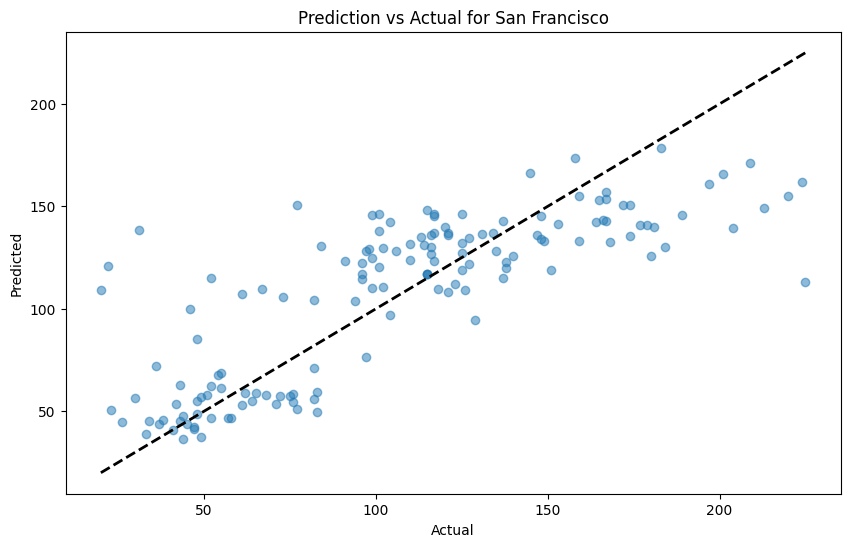

Model and predictions for San Francisco loaded and plotted.


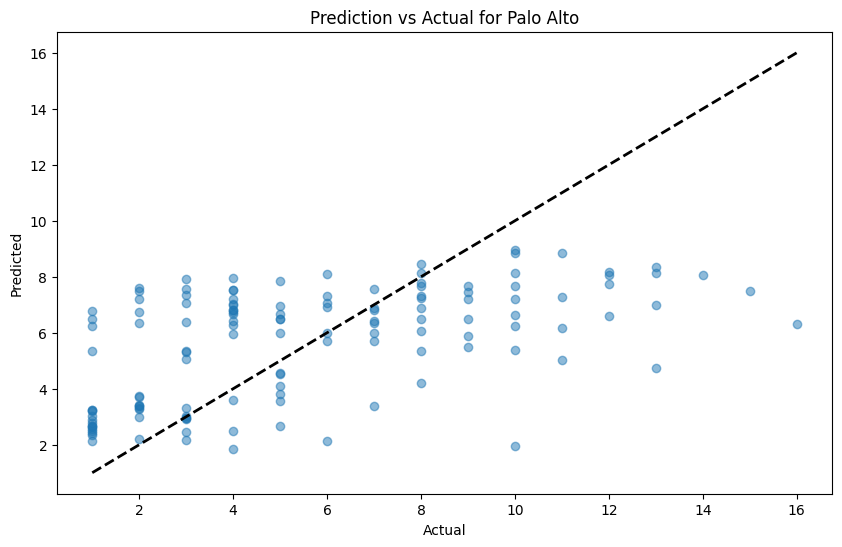

Model and predictions for Palo Alto loaded and plotted.


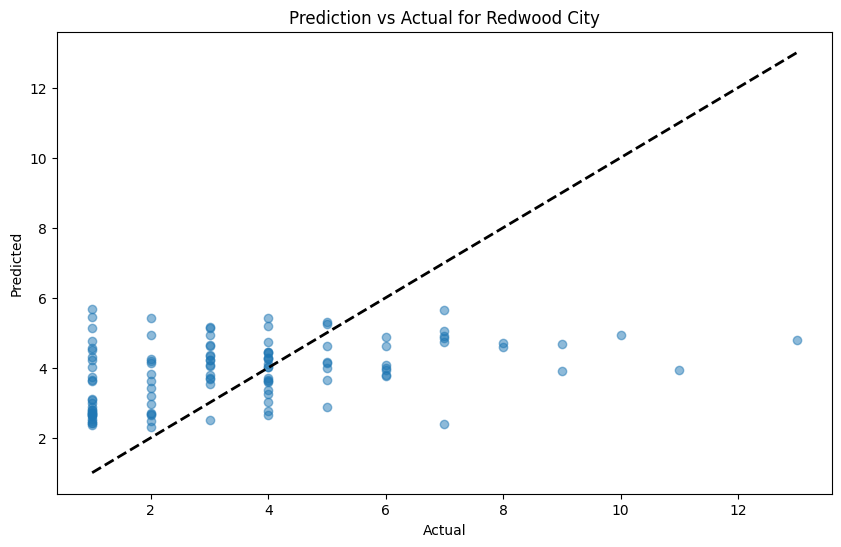

Model and predictions for Redwood City loaded and plotted.


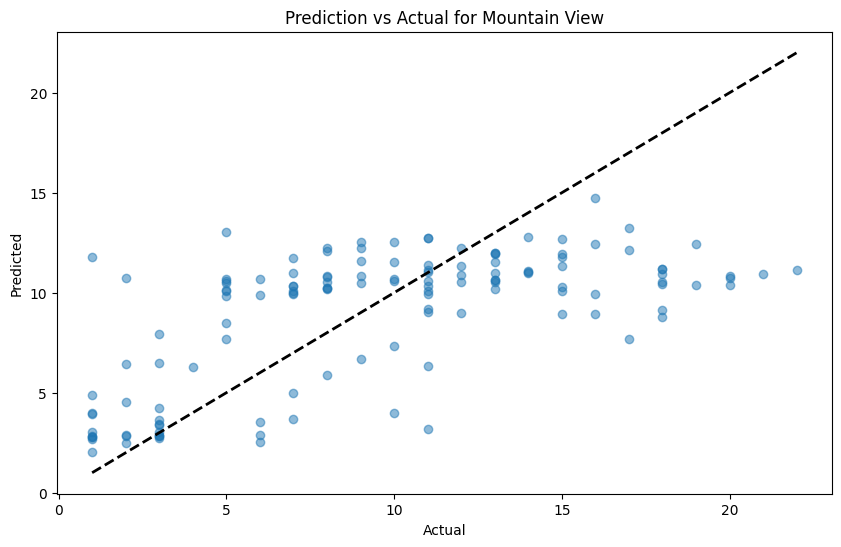

Model and predictions for Mountain View loaded and plotted.


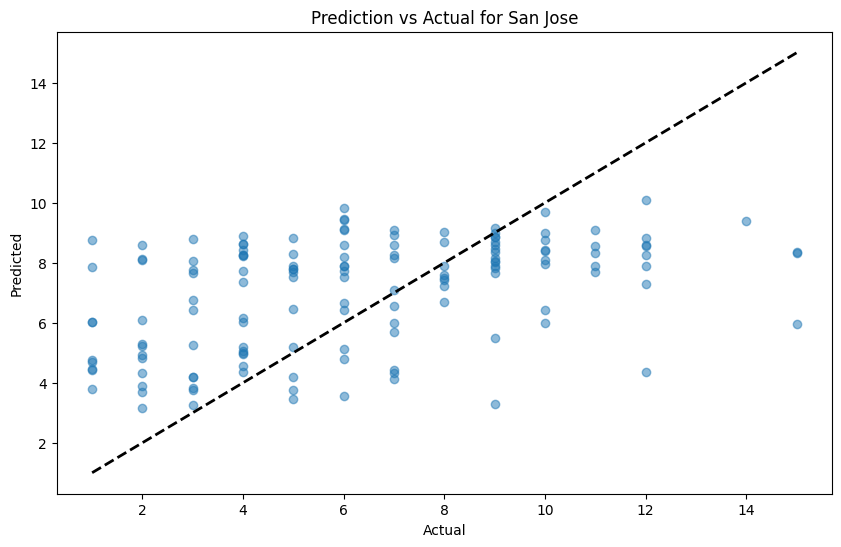

Model and predictions for San Jose loaded and plotted.


In [ ]:
import pickle
import matplotlib.pyplot as plt

# Define the plot function
def plot_prediction_vs_actual(y_true, y_pred, dataset_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Prediction vs Actual for {dataset_name}')
    plt.show()

# Assuming you have X_test and y_test for each city
test_datasets = {
    "San Francisco": (X_test_sf_scaled, y_test_sf),
    "Palo Alto": (X_test_pa_scaled, y_test_pa),
    "Redwood City": (X_test_re_scaled, y_test_re),
    "Mountain View": (X_test_mv_scaled, y_test_mv),
    "San Jose": (X_test_sj_scaled, y_test_sj)
}

# Load the models from pickle files and generate the plots
for city, (X_test_scaled, y_test) in test_datasets.items():
    filename = f"{city.replace(' ', '_').lower()}_RFR_final_model.pkl"
    with open(filename, 'rb') as file:
        model = pickle.load(file)

    # Generate predictions
    y_test_pred = model.predict(X_test_scaled)

    # Plot the results
    plot_prediction_vs_actual(y_test, y_test_pred, city)
    print(f"Model and predictions for {city} loaded and plotted.")

## Extra Trees Regressor

Train and Evaluate the Baseline Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Function to train and evaluate Random Forest Regressor
def train_and_evaluate_rf(X_train_scaled, y_train, dataset_name):
    # Split data into training and validation sets
    X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

    # Initialize the model
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    rf_regressor.fit(X_train_final, y_train_final)

    # Predict on the validation set
    y_val_pred = rf_regressor.predict(X_val)

    # Calculate performance metrics
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_val_pred)

    print(f"{dataset_name} Validation MSE: {mse}")
    print(f"{dataset_name} Validation RMSE: {rmse}")
    print(f"{dataset_name} Validation R^2: {r2}")

# Example datasets (replace these with your actual data)
datasets = {
    "San Francisco": (X_train_sf_scaled, y_train_sf),
    "Palo Alto": (X_train_pa_scaled, y_train_pa),
    "Redwood City": (X_train_re_scaled, y_train_re),
    "Mountain View": (X_train_mv_scaled, y_train_mv),
    "San Jose": (X_train_sj_scaled, y_train_sj)
}

# Train and evaluate the baseline model for each dataset
for city, (X_train_scaled, y_train) in datasets.items():
    print(f"Processing {city}...")
    train_and_evaluate_rf(X_train_scaled, y_train, city)

Processing San Francisco...


<ipython-input-79-2f8b12efb90e>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train_final, y_train_final)


San Francisco Validation MSE: 1020.5499623931626
San Francisco Validation RMSE: 31.94604768031818
San Francisco Validation R^2: 0.6511574814855359
Processing Palo Alto...


<ipython-input-79-2f8b12efb90e>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train_final, y_train_final)


Palo Alto Validation MSE: 11.117778846153847
Palo Alto Validation RMSE: 3.3343333435866676
Palo Alto Validation R^2: 0.21842061681453318
Processing Redwood City...


<ipython-input-79-2f8b12efb90e>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train_final, y_train_final)


Redwood City Validation MSE: 4.7816397727272735
Redwood City Validation RMSE: 2.1866960860456293
Redwood City Validation R^2: 0.030425534811866495
Processing Mountain View...


<ipython-input-79-2f8b12efb90e>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train_final, y_train_final)


Mountain View Validation MSE: 14.96882380952381
Mountain View Validation RMSE: 3.8689564238336684
Mountain View Validation R^2: 0.39878000065575203
Processing San Jose...


<ipython-input-79-2f8b12efb90e>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train_final, y_train_final)


San Jose Validation MSE: 13.832319642857142
San Jose Validation RMSE: 3.719182657904441
San Jose Validation R^2: 0.18846147413321368


| Dataset        | Validation RMSE | Validation MSE | Validation R² |
|----------------|-----------------|-----------------|---------------|
| San Francisco  |     31.9460     |    1020.5500    |    0.6512     |
| Palo Alto      |     3.3343      |     11.1178     |    0.2184     |
| Redwood City   |     2.1867      |      4.7816     |    0.0304     |
| Mountain View  |     3.8690      |     14.9688     |    0.3988     |
| San Jose       |     3.7192      |     13.8323     |    0.1885     |


Apply Bayesian Optimization

In [ ]:
from skopt import gp_minimize
from skopt.space import Integer, Real
from skopt.utils import use_named_args

# Define the parameter space
param_space = [
    Integer(10, 300, name='n_estimators'),
    Real(0.1, 0.9, name='max_features'),
    Integer(5, 50, name='max_depth'),
    Integer(2, 10, name='min_samples_split'),
    Integer(1, 10, name='min_samples_leaf')
]

# Function to perform Bayesian optimization and evaluate the model
def optimize_and_evaluate(X_train_scaled, y_train, dataset_name):
    # Split data into training and validation sets
    X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

    # Define the objective function
    @use_named_args(param_space)
    def rf_cv(n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf):
        # Initialize the model with given hyperparameters
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_features=max_features,
            max_depth=int(max_depth),
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            random_state=42
        )

        # Train the model
        model.fit(X_train_final, y_train_final)

        # Predict on the validation set
        y_val_pred = model.predict(X_val)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        return rmse

    # Perform Bayesian Optimization
    res = gp_minimize(
        rf_cv,
        param_space,
        n_calls=30,
        random_state=42,
        verbose=2
    )

    # Extract the best parameters
    best_params = res.x
    best_params_dict = {
        'n_estimators': best_params[0],
        'max_features': best_params[1],
        'max_depth': best_params[2],
        'min_samples_split': best_params[3],
        'min_samples_leaf': best_params[4]
    }

    # Train the final model with best parameters
    best_rf_model = RandomForestRegressor(
        n_estimators=best_params_dict['n_estimators'],
        max_features=best_params_dict['max_features'],
        max_depth=best_params_dict['max_depth'],
        min_samples_split=best_params_dict['min_samples_split'],
        min_samples_leaf=best_params_dict['min_samples_leaf'],
        random_state=42
    )

    best_rf_model.fit(X_train_final, y_train_final)

    # Evaluate the final model
    y_val_pred = best_rf_model.predict(X_val)
    final_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    final_mse = mean_squared_error(y_val, y_val_pred)
    final_r2 = r2_score(y_val, y_val_pred)

    print(f"{dataset_name} - Final Validation RMSE: {final_rmse}")
    print(f"{dataset_name} - Final Validation MSE: {final_mse}")
    print(f"{dataset_name} - Final Validation R²: {final_r2}")

    return best_params_dict, final_rmse, final_mse, final_r2

# Dictionary to store results
results = {}

# Perform optimization and evaluation for each dataset
for city, (X_train_scaled, y_train) in datasets.items():
    print(f"Optimizing {city}...")
    best_params, rmse, mse, r2 = optimize_and_evaluate(X_train_scaled, y_train, city)
    results[city] = {
        "Best Params": best_params,
        "RMSE": rmse,
        "MSE": mse,
        "R²": r2
    }

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

Optimizing San Francisco...
Iteration No: 1 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.4860
Function value obtained: 33.2760
Current minimum: 33.2760
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0992
Function value obtained: 33.2203
Current minimum: 33.2203
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0744
Function value obtained: 33.9960
Current minimum: 33.2203
Iteration No: 4 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.4243
Function value obtained: 33.2891
Current minimum: 33.2203
Iteration No: 5 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.2467
Function value obtained: 35.5965
Current minimum: 33.2203
Iteration No: 6 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 6 ended. Evaluation done at random point.
Time taken: 0.4043
Function value obtained: 33.1566
Current minimum: 33.1566
Iteration No: 7 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 7 ended. Evaluation done at random point.
Time taken: 0.4632
Function value obtained: 33.0980
Current minimum: 33.0980
Iteration No: 8 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 8 ended. Evaluation done at random point.
Time taken: 0.3247
Function value obtained: 40.8488
Current minimum: 33.0980
Iteration No: 9 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 9 ended. Evaluation done at random point.
Time taken: 0.9258
Function value obtained: 31.7166
Current minimum: 31.7166
Iteration No: 10 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 1.9890
Function value obtained: 31.3146
Current minimum: 31.3146
Iteration No: 11 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 1.3225
Function value obtained: 30.9200
Current minimum: 30.9200
Iteration No: 12 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 0.7296
Function value obtained: 35.3018
Current minimum: 30.9200
Iteration No: 13 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 1.5668
Function value obtained: 30.6599
Current minimum: 30.6599
Iteration No: 14 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.8111
Function value obtained: 32.6508
Current minimum: 30.6599
Iteration No: 15 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 1.5208
Function value obtained: 31.6307
Current minimum: 30.6599
Iteration No: 16 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 0.6238
Function value obtained: 30.8694
Current minimum: 30.6599
Iteration No: 17 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 1.2147
Function value obtained: 31.5561
Current minimum: 30.6599
Iteration No: 18 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 1.2318
Function value obtained: 30.6526
Current minimum: 30.6526
Iteration No: 19 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 0.7914
Function value obtained: 32.5540
Current minimum: 30.6526
Iteration No: 20 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 1.9844
Function value obtained: 31.0081
Current minimum: 30.6526
Iteration No: 21 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 2.3034
Function value obtained: 30.6441
Current minimum: 30.6441
Iteration No: 22 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 1.6957
Function value obtained: 30.6671
Current minimum: 30.6441
Iteration No: 23 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 0.8022
Function value obtained: 31.1601
Current minimum: 30.6441
Iteration No: 24 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 1.7711
Function value obtained: 30.6441
Current minimum: 30.6441
Iteration No: 25 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 1.8437
Function value obtained: 30.9610
Current minimum: 30.6441
Iteration No: 26 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 1.4664
Function value obtained: 33.1647
Current minimum: 30.6441
Iteration No: 27 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 1.8242
Function value obtained: 31.0048
Current minimum: 30.6441
Iteration No: 28 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 2.4413
Function value obtained: 30.6441
Current minimum: 30.6441
Iteration No: 29 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 2.3699
Function value obtained: 30.8778
Current minimum: 30.6441
Iteration No: 30 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 1.8137
Function value obtained: 30.6441
Current minimum: 30.6441


<ipython-input-80-4ab6d2060969>:71: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf_model.fit(X_train_final, y_train_final)


San Francisco - Final Validation RMSE: 30.64410107466467
San Francisco - Final Validation MSE: 939.0609306742643
San Francisco - Final Validation R²: 0.6790119130211221
Optimizing Palo Alto...
Iteration No: 1 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.4877
Function value obtained: 3.2846
Current minimum: 3.2846
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0949
Function value obtained: 3.2170
Current minimum: 3.2170
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0688
Function value obtained: 3.2275
Current minimum: 3.2170
Iteration No: 4 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.4147
Function value obtained: 3.2232
Current minimum: 3.2170
Iteration No: 5 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.2371
Function value obtained: 3.3685
Current minimum: 3.2170
Iteration No: 6 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 6 ended. Evaluation done at random point.
Time taken: 0.3759
Function value obtained: 3.2633
Current minimum: 3.2170
Iteration No: 7 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 7 ended. Evaluation done at random point.
Time taken: 0.4166
Function value obtained: 3.2325
Current minimum: 3.2170
Iteration No: 8 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 8 ended. Evaluation done at random point.
Time taken: 0.2092
Function value obtained: 3.4742
Current minimum: 3.2170
Iteration No: 9 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 9 ended. Evaluation done at random point.
Time taken: 0.6176
Function value obtained: 3.2543
Current minimum: 3.2170
Iteration No: 10 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 1.0125
Function value obtained: 3.2862
Current minimum: 3.2170
Iteration No: 11 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 0.4664
Function value obtained: 3.2279
Current minimum: 3.2170
Iteration No: 12 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 0.6274
Function value obtained: 3.1417
Current minimum: 3.1417
Iteration No: 13 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 1.3769
Function value obtained: 3.1882
Current minimum: 3.1417
Iteration No: 14 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.9136
Function value obtained: 3.3755
Current minimum: 3.1417
Iteration No: 15 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 1.0694
Function value obtained: 3.2239
Current minimum: 3.1417
Iteration No: 16 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 1.5502
Function value obtained: 3.2736
Current minimum: 3.1417
Iteration No: 17 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 1.5631
Function value obtained: 3.2009
Current minimum: 3.1417
Iteration No: 18 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 0.8805
Function value obtained: 3.2334
Current minimum: 3.1417
Iteration No: 19 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 0.7392
Function value obtained: 3.2065
Current minimum: 3.1417
Iteration No: 20 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 1.0309
Function value obtained: 3.2266
Current minimum: 3.1417
Iteration No: 21 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 1.4088
Function value obtained: 3.1946
Current minimum: 3.1417
Iteration No: 22 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 0.6993
Function value obtained: 3.2913
Current minimum: 3.1417
Iteration No: 23 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 0.6919
Function value obtained: 3.1891
Current minimum: 3.1417
Iteration No: 24 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 0.7727
Function value obtained: 3.3291
Current minimum: 3.1417
Iteration No: 25 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 0.6625
Function value obtained: 3.2431
Current minimum: 3.1417
Iteration No: 26 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 0.8955
Function value obtained: 3.1875
Current minimum: 3.1417
Iteration No: 27 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 1.1448
Function value obtained: 3.1620
Current minimum: 3.1417
Iteration No: 28 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 0.9079
Function value obtained: 3.2132
Current minimum: 3.1417
Iteration No: 29 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 1.4666
Function value obtained: 3.1920
Current minimum: 3.1417
Iteration No: 30 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 1.7117
Function value obtained: 3.1882
Current minimum: 3.1417
Palo Alto - Final Validation RMSE: 3.141713497340314
Palo Alto - Final Validation MSE: 9.870363699370309
Palo Alto - Final Validation R²: 0.3061138489331562
Optimizing Redwood City...
Iteration No: 1 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:71: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf_model.fit(X_train_final, y_train_final)
<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.4467
Function value obtained: 2.0919
Current minimum: 2.0919
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0895
Function value obtained: 2.0831
Current minimum: 2.0831
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0642
Function value obtained: 2.1841
Current minimum: 2.0831
Iteration No: 4 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.3688
Function value obtained: 2.0941
Current minimum: 2.0831
Iteration No: 5 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.2255
Function value obtained: 2.1075
Current minimum: 2.0831
Iteration No: 6 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 6 ended. Evaluation done at random point.
Time taken: 0.3732
Function value obtained: 2.1089
Current minimum: 2.0831
Iteration No: 7 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 7 ended. Evaluation done at random point.
Time taken: 0.3900
Function value obtained: 2.0980
Current minimum: 2.0831
Iteration No: 8 started. Evaluating function at random point.
Iteration No: 8 ended. Evaluation done at random point.
Time taken: 0.1879
Function value obtained: 2.1244
Current minimum: 2.0831
Iteration No: 9 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 9 ended. Evaluation done at random point.
Time taken: 0.5472
Function value obtained: 2.1118
Current minimum: 2.0831
Iteration No: 10 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 1.1041
Function value obtained: 2.1303
Current minimum: 2.0831
Iteration No: 11 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 0.5559
Function value obtained: 2.1349
Current minimum: 2.0831
Iteration No: 12 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 0.9551
Function value obtained: 2.1039
Current minimum: 2.0831
Iteration No: 13 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 0.6425
Function value obtained: 2.2506
Current minimum: 2.0831
Iteration No: 14 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.7050
Function value obtained: 2.1831
Current minimum: 2.0831
Iteration No: 15 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 0.6837
Function value obtained: 2.1083
Current minimum: 2.0831
Iteration No: 16 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 0.6984
Function value obtained: 2.0669
Current minimum: 2.0669
Iteration No: 17 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 0.7432
Function value obtained: 2.0624
Current minimum: 2.0624
Iteration No: 18 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 0.7104
Function value obtained: 2.0581
Current minimum: 2.0581
Iteration No: 19 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 1.1386
Function value obtained: 2.0939
Current minimum: 2.0581
Iteration No: 20 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 1.0654
Function value obtained: 2.0562
Current minimum: 2.0562
Iteration No: 21 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 1.5615
Function value obtained: 2.1027
Current minimum: 2.0562
Iteration No: 22 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 1.3270
Function value obtained: 2.0799
Current minimum: 2.0562
Iteration No: 23 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 0.8056
Function value obtained: 2.0585
Current minimum: 2.0562
Iteration No: 24 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 1.1528
Function value obtained: 2.0788
Current minimum: 2.0562
Iteration No: 25 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 1.1850
Function value obtained: 2.0927
Current minimum: 2.0562
Iteration No: 26 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 1.2222
Function value obtained: 2.0892
Current minimum: 2.0562
Iteration No: 27 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 1.5571
Function value obtained: 2.1510
Current minimum: 2.0562
Iteration No: 28 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 0.9500
Function value obtained: 2.1570
Current minimum: 2.0562
Iteration No: 29 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 1.3161
Function value obtained: 2.0884
Current minimum: 2.0562
Iteration No: 30 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 1.5165
Function value obtained: 2.1255
Current minimum: 2.0562


<ipython-input-80-4ab6d2060969>:71: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf_model.fit(X_train_final, y_train_final)


Redwood City - Final Validation RMSE: 2.0562463744169204
Redwood City - Final Validation MSE: 4.228149152302731
Redwood City - Final Validation R²: 0.1426569863205377
Optimizing Mountain View...
Iteration No: 1 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.8098
Function value obtained: 3.9612
Current minimum: 3.9612
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1717
Function value obtained: 3.9263
Current minimum: 3.9263
Iteration No: 3 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1226
Function value obtained: 4.0036
Current minimum: 3.9263
Iteration No: 4 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.7504
Function value obtained: 3.9246
Current minimum: 3.9246
Iteration No: 5 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.4397
Function value obtained: 4.0899
Current minimum: 3.9246
Iteration No: 6 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 6 ended. Evaluation done at random point.
Time taken: 0.7976
Function value obtained: 3.9474
Current minimum: 3.9246
Iteration No: 7 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 7 ended. Evaluation done at random point.
Time taken: 0.8315
Function value obtained: 3.9208
Current minimum: 3.9208
Iteration No: 8 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 8 ended. Evaluation done at random point.
Time taken: 0.4283
Function value obtained: 4.3106
Current minimum: 3.9208
Iteration No: 9 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 9 ended. Evaluation done at random point.
Time taken: 0.9700
Function value obtained: 3.8595
Current minimum: 3.8595
Iteration No: 10 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 1.2299
Function value obtained: 3.8814
Current minimum: 3.8595
Iteration No: 11 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 1.0532
Function value obtained: 3.8801
Current minimum: 3.8595
Iteration No: 12 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 1.4586
Function value obtained: 3.9043
Current minimum: 3.8595
Iteration No: 13 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 1.4684
Function value obtained: 3.9123
Current minimum: 3.8595
Iteration No: 14 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.6233
Function value obtained: 4.2384
Current minimum: 3.8595
Iteration No: 15 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 0.8056
Function value obtained: 4.0872
Current minimum: 3.8595
Iteration No: 16 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 0.6422
Function value obtained: 4.0391
Current minimum: 3.8595
Iteration No: 17 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 1.1682
Function value obtained: 3.9308
Current minimum: 3.8595
Iteration No: 18 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 1.5708
Function value obtained: 3.9404
Current minimum: 3.8595
Iteration No: 19 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 1.5513
Function value obtained: 3.9052
Current minimum: 3.8595
Iteration No: 20 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 1.6291
Function value obtained: 3.8944
Current minimum: 3.8595
Iteration No: 21 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 1.0750
Function value obtained: 3.8711
Current minimum: 3.8595
Iteration No: 22 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 0.5575
Function value obtained: 4.0255
Current minimum: 3.8595
Iteration No: 23 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 1.3424
Function value obtained: 3.9064
Current minimum: 3.8595
Iteration No: 24 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 0.7974
Function value obtained: 3.8934
Current minimum: 3.8595
Iteration No: 25 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 1.2058
Function value obtained: 3.8531
Current minimum: 3.8531
Iteration No: 26 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 1.4652
Function value obtained: 3.8952
Current minimum: 3.8531
Iteration No: 27 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 1.0428
Function value obtained: 3.9170
Current minimum: 3.8531
Iteration No: 28 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 0.7943
Function value obtained: 4.2995
Current minimum: 3.8531
Iteration No: 29 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 0.9740
Function value obtained: 3.9418
Current minimum: 3.8531
Iteration No: 30 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 1.2847
Function value obtained: 3.8751
Current minimum: 3.8531


<ipython-input-80-4ab6d2060969>:71: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf_model.fit(X_train_final, y_train_final)


Mountain View - Final Validation RMSE: 3.8530874592811033
Mountain View - Final Validation MSE: 14.846282968869307
Mountain View - Final Validation R²: 0.4037018305253153
Optimizing San Jose...
Iteration No: 1 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.7298
Function value obtained: 3.7084
Current minimum: 3.7084
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1448
Function value obtained: 3.6776
Current minimum: 3.6776
Iteration No: 3 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)
<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1151
Function value obtained: 3.6937
Current minimum: 3.6776
Iteration No: 4 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.6465
Function value obtained: 3.6355
Current minimum: 3.6355
Iteration No: 5 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.3946
Function value obtained: 3.7188
Current minimum: 3.6355
Iteration No: 6 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 6 ended. Evaluation done at random point.
Time taken: 0.5119
Function value obtained: 3.6565
Current minimum: 3.6355
Iteration No: 7 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 7 ended. Evaluation done at random point.
Time taken: 0.4560
Function value obtained: 3.6312
Current minimum: 3.6312
Iteration No: 8 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 8 ended. Evaluation done at random point.
Time taken: 0.2162
Function value obtained: 3.7805
Current minimum: 3.6312
Iteration No: 9 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 9 ended. Evaluation done at random point.
Time taken: 0.6696
Function value obtained: 3.6603
Current minimum: 3.6312
Iteration No: 10 started. Evaluating function at random point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 1.3025
Function value obtained: 3.6408
Current minimum: 3.6312
Iteration No: 11 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 1.0120
Function value obtained: 3.6298
Current minimum: 3.6298
Iteration No: 12 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 1.5175
Function value obtained: 3.6511
Current minimum: 3.6298
Iteration No: 13 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 1.2590
Function value obtained: 3.6360
Current minimum: 3.6298
Iteration No: 14 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 1.1917
Function value obtained: 3.6211
Current minimum: 3.6211
Iteration No: 15 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 1.2122
Function value obtained: 3.6393
Current minimum: 3.6211
Iteration No: 16 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 1.4836
Function value obtained: 3.6519
Current minimum: 3.6211
Iteration No: 17 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 1.9033
Function value obtained: 3.6219
Current minimum: 3.6211
Iteration No: 18 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 2.2285
Function value obtained: 3.6203
Current minimum: 3.6203
Iteration No: 19 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 0.7246
Function value obtained: 3.6824
Current minimum: 3.6203
Iteration No: 20 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 1.7212
Function value obtained: 3.6917
Current minimum: 3.6203
Iteration No: 21 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 1.3973
Function value obtained: 3.6158
Current minimum: 3.6158
Iteration No: 22 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 1.6696
Function value obtained: 3.6956
Current minimum: 3.6158
Iteration No: 23 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 1.6474
Function value obtained: 3.6925
Current minimum: 3.6158
Iteration No: 24 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 1.2489
Function value obtained: 3.6400
Current minimum: 3.6158
Iteration No: 25 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 1.5296
Function value obtained: 3.6187
Current minimum: 3.6158
Iteration No: 26 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 1.0586
Function value obtained: 3.8122
Current minimum: 3.6158
Iteration No: 27 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 2.4942
Function value obtained: 3.7166
Current minimum: 3.6158
Iteration No: 28 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 1.5425
Function value obtained: 3.6384
Current minimum: 3.6158
Iteration No: 29 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 0.7183
Function value obtained: 3.7604
Current minimum: 3.6158
Iteration No: 30 started. Searching for the next optimal point.


<ipython-input-80-4ab6d2060969>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_final, y_train_final)


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 1.3858
Function value obtained: 3.7216
Current minimum: 3.6158


<ipython-input-80-4ab6d2060969>:71: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf_model.fit(X_train_final, y_train_final)


San Jose - Final Validation RMSE: 3.6158036695487428
San Jose - Final Validation MSE: 13.074036176722155
San Jose - Final Validation R²: 0.23294976403577672
                                                     Best Params       RMSE  \
San Francisco  {'n_estimators': 300, 'max_features': 0.475870...  30.644101   
Palo Alto      {'n_estimators': 11, 'max_features': 0.9, 'max...   3.141713   
Redwood City   {'n_estimators': 46, 'max_features': 0.9, 'max...   2.056246   
Mountain View  {'n_estimators': 163, 'max_features': 0.836850...   3.853087   
San Jose       {'n_estimators': 300, 'max_features': 0.799077...   3.615804   

                      MSE        R²  
San Francisco  939.060931  0.679012  
Palo Alto        9.870364  0.306114  
Redwood City     4.228149  0.142657  
Mountain View   14.846283  0.403702  
San Jose        13.074036   0.23295  


| Dataset        | MSE        | R²        |
|----------------|------------|-----------|
| San Francisco  | 939.060931 | 0.679012  |
| Palo Alto      | 9.870364   | 0.306114  |
| Redwood City   | 4.228149   | 0.142657  |
| Mountain View  | 14.846283  | 0.403702  |
| San Jose       | 13.074036  | 0.23295   |


Train the Final Models and Save Them Using Pickle

In [ ]:
import pickle

# Function to train the final model with the best parameters
def train_final_model(X_train, y_train, best_params_dict):
    final_rf_model = RandomForestRegressor(
        n_estimators=int(best_params_dict['n_estimators']),
        max_features=best_params_dict['max_features'],
        max_depth=int(best_params_dict['max_depth']),
        min_samples_split=int(best_params_dict['min_samples_split']),
        min_samples_leaf=int(best_params_dict['min_samples_leaf']),
        random_state=42
    )
    final_rf_model.fit(X_train, y_train)
    return final_rf_model

# Dictionary to store final models
final_models = {}

# Train the final models for each dataset and save them using pickle
for city, (X_train_scaled, y_train) in datasets.items():
    best_params = results[city]["Best Params"]
    final_model = train_final_model(X_train_scaled, y_train, best_params)
    final_models[city] = final_model

    # Save the model to a pickle file
    filename = f"{city.replace(' ', '_').lower()}_final_etr_model.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(final_model, file)
    print(f"Model for {city} saved as {filename}")


<ipython-input-81-7efe1eb9ac05>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_rf_model.fit(X_train, y_train)


Model for San Francisco saved as san_francisco_final_etr_model.pkl
Model for Palo Alto saved as palo_alto_final_etr_model.pkl


<ipython-input-81-7efe1eb9ac05>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_rf_model.fit(X_train, y_train)
<ipython-input-81-7efe1eb9ac05>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_rf_model.fit(X_train, y_train)


Model for Redwood City saved as redwood_city_final_etr_model.pkl


<ipython-input-81-7efe1eb9ac05>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_rf_model.fit(X_train, y_train)


Model for Mountain View saved as mountain_view_final_etr_model.pkl


<ipython-input-81-7efe1eb9ac05>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_rf_model.fit(X_train, y_train)


Model for San Jose saved as san_jose_final_etr_model.pkl


Load the Models and Generate Actual vs. Predicted Graphs

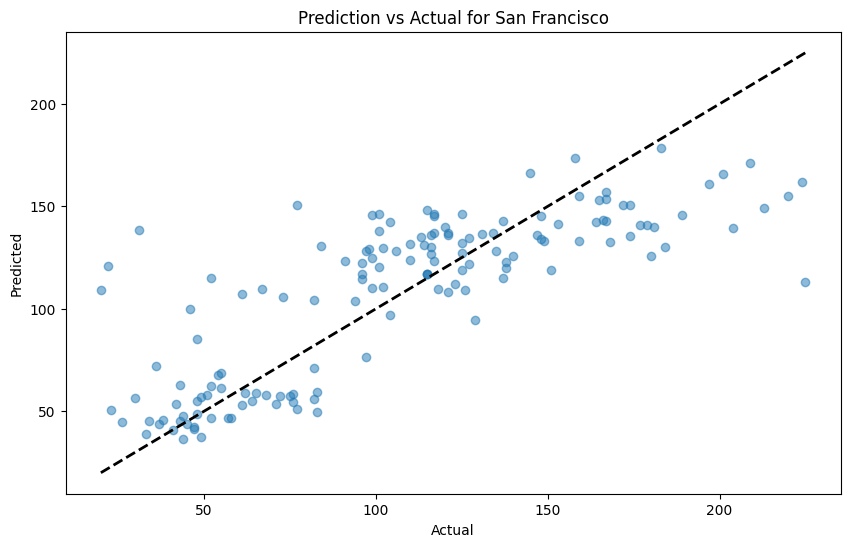

Model and predictions for San Francisco loaded and plotted.


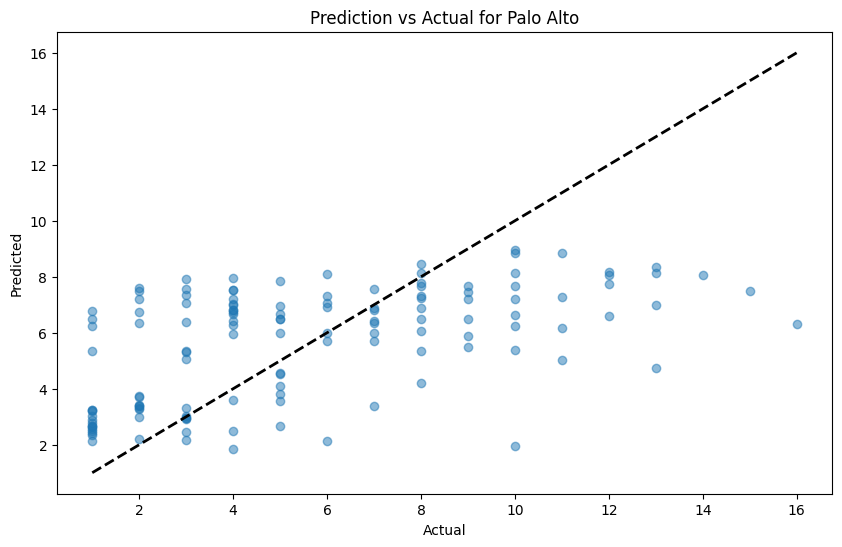

Model and predictions for Palo Alto loaded and plotted.


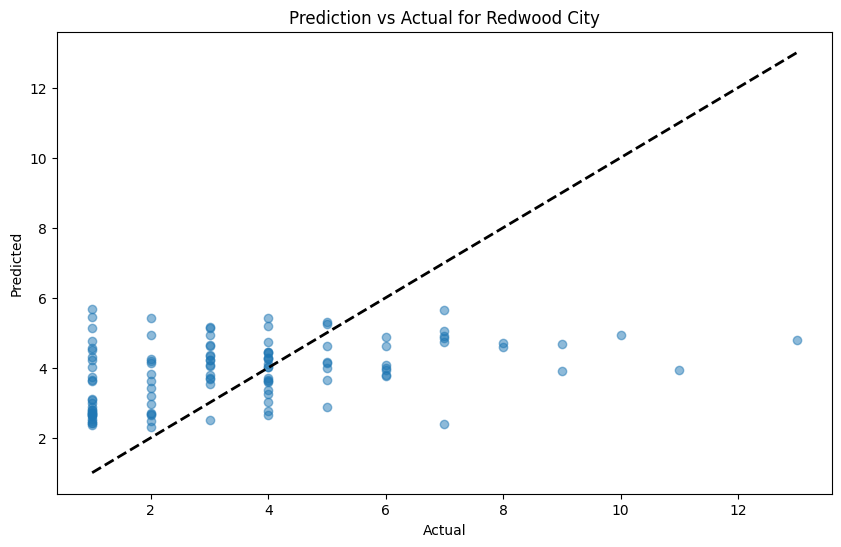

Model and predictions for Redwood City loaded and plotted.


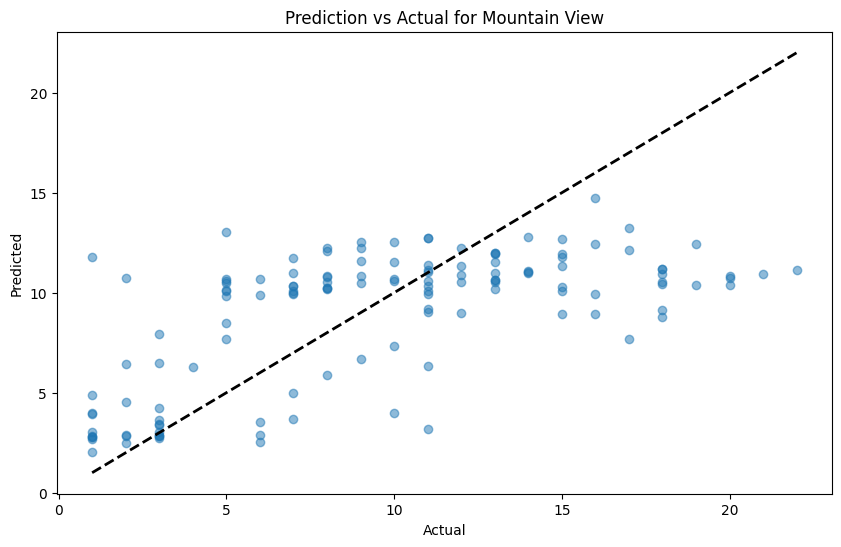

Model and predictions for Mountain View loaded and plotted.


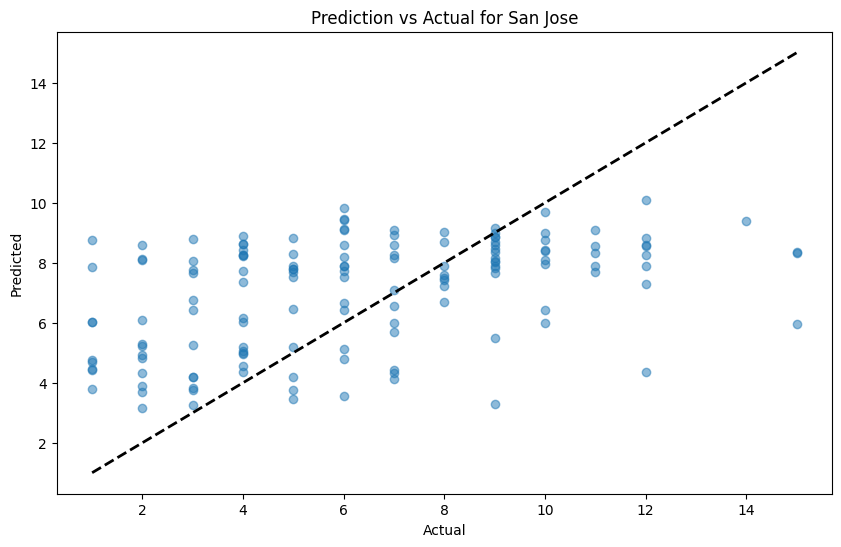

Model and predictions for San Jose loaded and plotted.


In [ ]:
import matplotlib.pyplot as plt

# Define the plot function
def plot_prediction_vs_actual(y_true, y_pred, dataset_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Prediction vs Actual for {dataset_name}')
    plt.show()

# Assuming you have X_test and y_test for each city
test_datasets = {
    "San Francisco": (X_test_sf_scaled, y_test_sf),
    "Palo Alto": (X_test_pa_scaled, y_test_pa),
    "Redwood City": (X_test_re_scaled, y_test_re),
    "Mountain View": (X_test_mv_scaled, y_test_mv),
    "San Jose": (X_test_sj_scaled, y_test_sj)
}

# Load the models from pickle files and generate the plots
for city, (X_test_scaled, y_test) in test_datasets.items():
    filename = f"{city.replace(' ', '_').lower()}_final_etr_model.pkl"
    with open(filename, 'rb') as file:
        model = pickle.load(file)

    # Generate predictions
    y_test_pred = model.predict(X_test_scaled)

    # Plot the results
    plot_prediction_vs_actual(y_test, y_test_pred, city)
    print(f"Model and predictions for {city} loaded and plotted.")


**XG Boost Regression**

Train and Evaluate the Baseline XGBoost Model

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Function to train and evaluate XGBoost Regressor
def train_and_evaluate_xgb(X_train_scaled, y_train, dataset_name):
    # Split data into training and validation sets
    X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

    # Initialize the model
    xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)

    # Train the model
    xgb_regressor.fit(X_train_final, y_train_final)

    # Predict on the validation set
    y_val_pred = xgb_regressor.predict(X_val)

    # Calculate performance metrics
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_val_pred)

    print(f"{dataset_name} Validation MSE: {mse}")
    print(f"{dataset_name} Validation RMSE: {rmse}")
    print(f"{dataset_name} Validation R^2: {r2}")

# Example datasets (replace these with your actual data)
datasets = {
    "San Francisco": (X_train_sf_scaled, y_train_sf),
    "Palo Alto": (X_train_pa_scaled, y_train_pa),
    "Redwood City": (X_train_re_scaled, y_train_re),
    "Mountain View": (X_train_mv_scaled, y_train_mv),
    "San Jose": (X_train_sj_scaled, y_train_sj)
}

# Train and evaluate the baseline model for each dataset
for city, (X_train_scaled, y_train) in datasets.items():
    print(f"Processing {city}...")
    train_and_evaluate_xgb(X_train_scaled, y_train, city)

Processing San Francisco...
San Francisco Validation MSE: 1084.9033399546472
San Francisco Validation RMSE: 32.93787090803908
San Francisco Validation R^2: 0.6291603278617997
Processing Palo Alto...
Palo Alto Validation MSE: 14.997499814591729
Palo Alto Validation RMSE: 3.8726605602081534
Palo Alto Validation R^2: -0.05432360335786379
Processing Redwood City...
Redwood City Validation MSE: 5.113636252160248
Redwood City Validation RMSE: 2.2613350596849306
Redwood City Validation R^2: -0.03689348633785361
Processing Mountain View...
Mountain View Validation MSE: 16.486324355329973
Mountain View Validation RMSE: 4.06033549787822
Mountain View Validation R^2: 0.3378298759990638
Processing San Jose...
San Jose Validation MSE: 15.01260685522775
San Jose Validation RMSE: 3.874610542393616
San Jose Validation R^2: 0.11921433633147238


Apply Bayesian Optimization


In [ ]:
from skopt import gp_minimize
from skopt.space import Integer, Real
from skopt.utils import use_named_args

# Define the parameter space
param_space = [
    Integer(50, 500, name='n_estimators'),
    Real(0.01, 1.0, name='learning_rate'),
    Integer(3, 20, name='max_depth'),
    Real(0.1, 1.0, name='subsample'),
    Real(0.1, 1.0, name='colsample_bytree')
]

# Function to perform Bayesian optimization and evaluate the model
def optimize_and_evaluate_xgb(X_train_scaled, y_train, dataset_name):
    # Split data into training and validation sets
    X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

    # Define the objective function
    @use_named_args(param_space)
    def xgb_cv(n_estimators, learning_rate, max_depth, subsample, colsample_bytree):
        # Initialize the model with given hyperparameters
        model = xgb.XGBRegressor(
            n_estimators=int(n_estimators),
            learning_rate=learning_rate,
            max_depth=int(max_depth),
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            random_state=42
        )

        # Train the model
        model.fit(X_train_final, y_train_final)

        # Predict on the validation set
        y_val_pred = model.predict(X_val)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        return rmse

    # Perform Bayesian Optimization
    res = gp_minimize(
        xgb_cv,
        param_space,
        n_calls=30,
        random_state=42,
        verbose=2
    )

    # Extract the best parameters
    best_params = res.x
    best_params_dict = {
        'n_estimators': best_params[0],
        'learning_rate': best_params[1],
        'max_depth': best_params[2],
        'subsample': best_params[3],
        'colsample_bytree': best_params[4]
    }

    # Train the final model with best parameters
    best_xgb_model = xgb.XGBRegressor(
        n_estimators=best_params_dict['n_estimators'],
        learning_rate=best_params_dict['learning_rate'],
        max_depth=best_params_dict['max_depth'],
        subsample=best_params_dict['subsample'],
        colsample_bytree=best_params_dict['colsample_bytree'],
        random_state=42
    )

    best_xgb_model.fit(X_train_final, y_train_final)

    # Evaluate the final model
    y_val_pred = best_xgb_model.predict(X_val)
    final_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    final_mse = mean_squared_error(y_val, y_val_pred)
    final_r2 = r2_score(y_val, y_val_pred)

    print(f"{dataset_name} - Final Validation RMSE: {final_rmse}")
    print(f"{dataset_name} - Final Validation MSE: {final_mse}")
    print(f"{dataset_name} - Final Validation R²: {final_r2}")

    return best_params_dict, final_rmse, final_mse, final_r2

# Dictionary to store results
results_xgb = {}

# Perform optimization and evaluation for each dataset
for city, (X_train_scaled, y_train) in datasets.items():
    print(f"Optimizing {city}...")
    best_params, rmse, mse, r2 = optimize_and_evaluate_xgb(X_train_scaled, y_train, city)
    results_xgb[city] = {
        "Best Params": best_params,
        "RMSE": rmse,
        "MSE": mse,
        "R²": r2
    }

# Display the results
results_df_xgb = pd.DataFrame(results_xgb).T
print(results_df_xgb)


Optimizing San Francisco...
Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 6.5231
Function value obtained: 34.1070
Current minimum: 34.1070
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.3347
Function value obtained: 51.9390
Current minimum: 34.1070
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.2441
Function value obtained: 872.2908
Current minimum: 34.1070
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.3422
Function value obtained: 1298.9472
Current minimum: 34.1070
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.4194
Function value obtained: 41.2543
Current minimum: 34

| Dataset        | MSE        | R²        |
|----------------|------------|-----------|
| San Francisco  | 881.120457 | 0.698817  |
| Palo Alto      | 11.301043  | 0.205537  |
| Redwood City   | 4.481119   | 0.091362  |
| Mountain View  | 15.724516  | 0.368428  |
| San Jose       | 13.133964  | 0.229434  |


Train the Final Models and Save Them Using Pickle

In [ ]:
import pickle

# Function to train the final model with the best parameters
def train_final_model_xgb(X_train, y_train, best_params_dict):
    final_xgb_model = xgb.XGBRegressor(
        n_estimators=int(best_params_dict['n_estimators']),
        learning_rate=best_params_dict['learning_rate'],
        max_depth=int(best_params_dict['max_depth']),
        subsample=best_params_dict['subsample'],
        colsample_bytree=best_params_dict['colsample_bytree'],
        random_state=42
    )
    final_xgb_model.fit(X_train, y_train)
    return final_xgb_model

# Dictionary to store final models
final_models_xgb = {}

# Train the final models for each dataset and save them using pickle
for city, (X_train_scaled, y_train) in datasets.items():
    best_params = results_xgb[city]["Best Params"]
    final_model = train_final_model_xgb(X_train_scaled, y_train, best_params)
    final_models_xgb[city] = final_model

    # Save the model to a pickle file
    filename = f"{city.replace(' ', '_').lower()}_xgb_final_model.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(final_model, file)
    print(f"Model for {city} saved as {filename}")

Model for San Francisco saved as san_francisco_xgb_final_model.pkl
Model for Palo Alto saved as palo_alto_xgb_final_model.pkl
Model for Redwood City saved as redwood_city_xgb_final_model.pkl
Model for Mountain View saved as mountain_view_xgb_final_model.pkl
Model for San Jose saved as san_jose_xgb_final_model.pkl


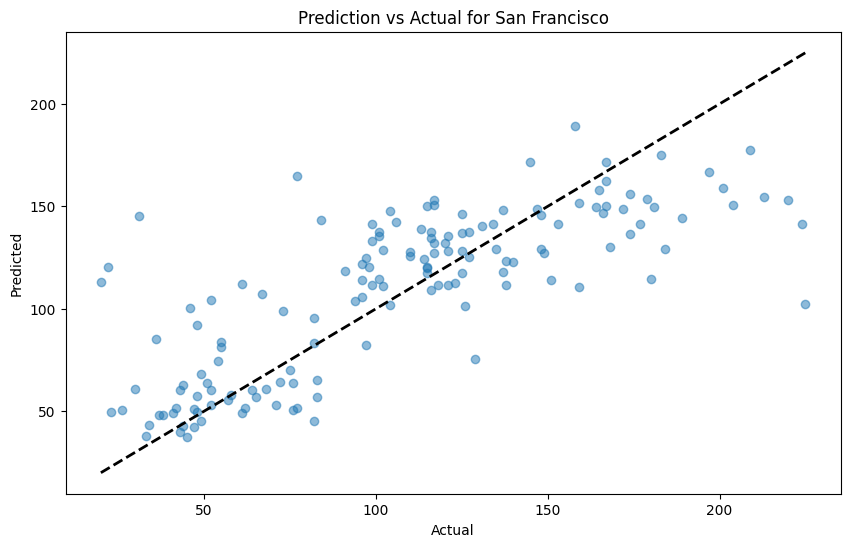

Model and predictions for San Francisco loaded and plotted.


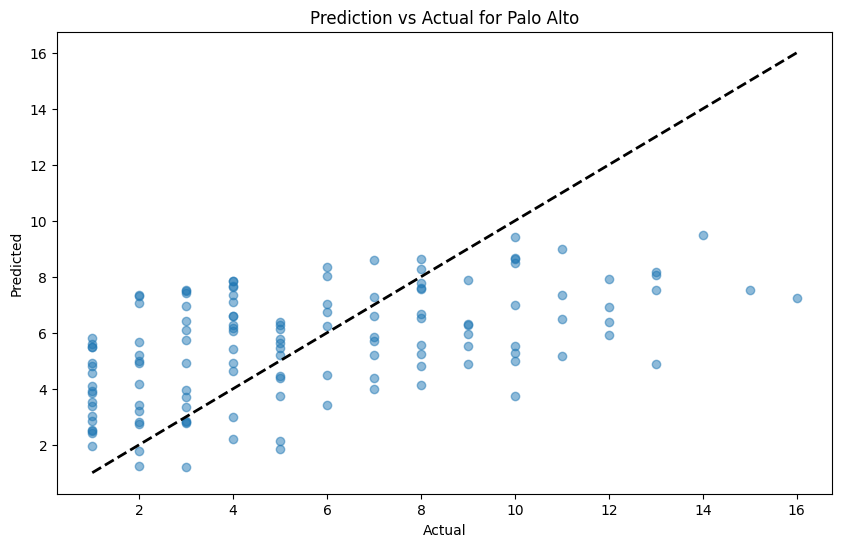

Model and predictions for Palo Alto loaded and plotted.


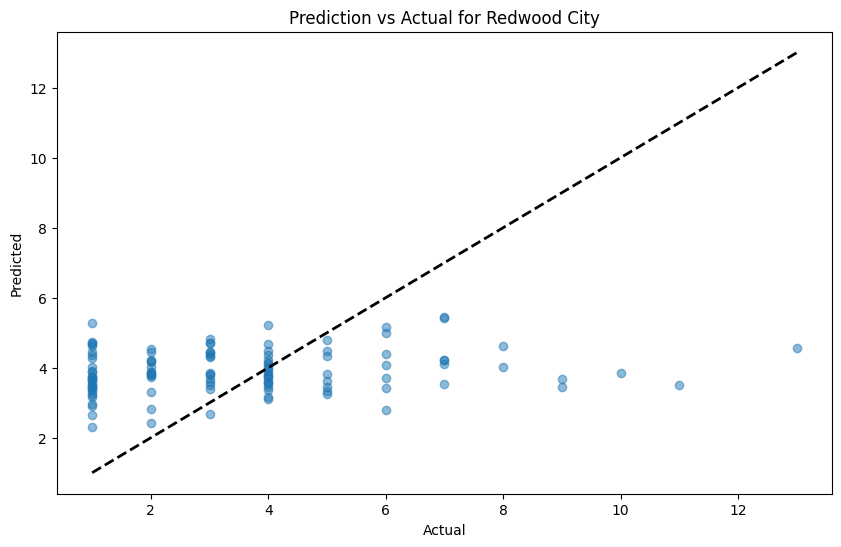

Model and predictions for Redwood City loaded and plotted.


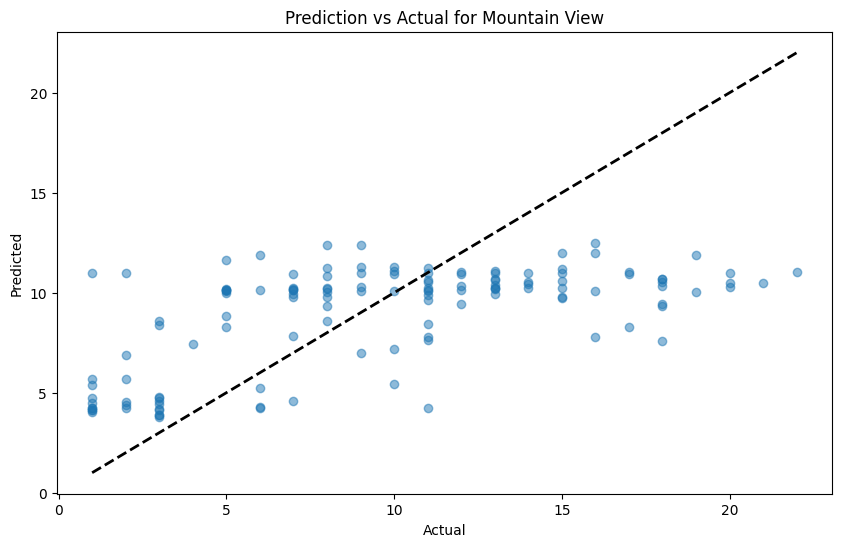

Model and predictions for Mountain View loaded and plotted.


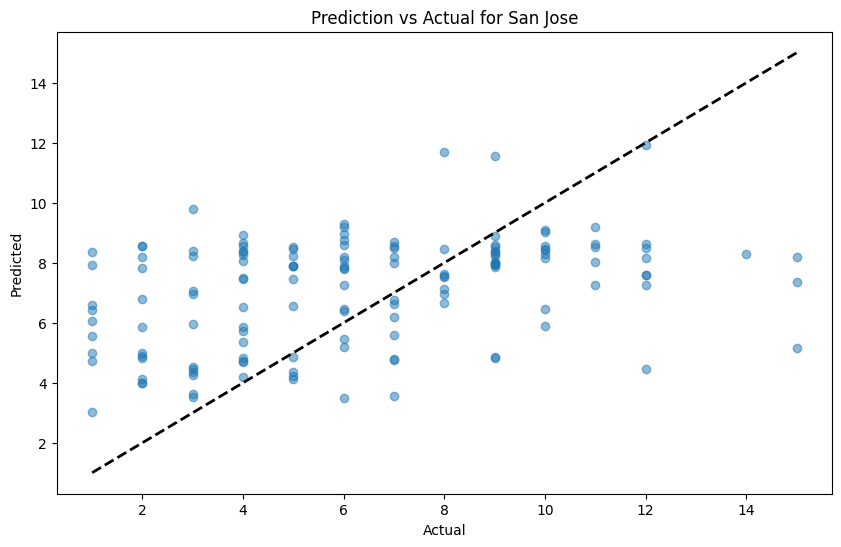

Model and predictions for San Jose loaded and plotted.


In [ ]:
import matplotlib.pyplot as plt

# Define the plot function
def plot_prediction_vs_actual(y_true, y_pred, dataset_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Prediction vs Actual for {dataset_name}')
    plt.show()

# Assuming you have X_test and y_test for each city
test_datasets = {
    "San Francisco": (X_test_sf_scaled, y_test_sf),
    "Palo Alto": (X_test_pa_scaled, y_test_pa),
    "Redwood City": (X_test_re_scaled, y_test_re),
    "Mountain View": (X_test_mv_scaled, y_test_mv),
    "San Jose": (X_test_sj_scaled, y_test_sj)
}

# Load the models from pickle files and generate the plots
for city, (X_test_scaled, y_test) in test_datasets.items():
    filename = f"{city.replace(' ', '_').lower()}_xgb_final_model.pkl"
    with open(filename, 'rb') as file:
        model = pickle.load(file)

    # Generate predictions
    y_test_pred = model.predict(X_test_scaled)

    # Plot the results
    plot_prediction_vs_actual(y_test, y_test_pred, city)
    print(f"Model and predictions for {city} loaded and plotted.")


## Gradient Boosting Regressor

Train and Evaluate the Baseline Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Function to train and evaluate Gradient Boosting Regressor
def train_and_evaluate_gb(X_train_scaled, y_train, dataset_name):
    # Split data into training and validation sets
    X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

    # Initialize the model
    gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

    # Train the model
    gb_regressor.fit(X_train_final, y_train_final)

    # Predict on the validation set
    y_val_pred = gb_regressor.predict(X_val)

    # Calculate performance metrics
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_val_pred)

    print(f"{dataset_name} Validation MSE: {mse}")
    print(f"{dataset_name} Validation RMSE: {rmse}")
    print(f"{dataset_name} Validation R^2: {r2}")

# Example datasets (replace these with your actual data)
datasets = {
    "San Francisco": (X_train_sf_scaled, y_train_sf),
    "Palo Alto": (X_train_pa_scaled, y_train_pa),
    "Redwood City": (X_train_re_scaled, y_train_re),
    "Mountain View": (X_train_mv_scaled, y_train_mv),
    "San Jose": (X_train_sj_scaled, y_train_sj)
}

# Train and evaluate the baseline model for each dataset
for city, (X_train_scaled, y_train) in datasets.items():
    print(f"Processing {city}...")
    train_and_evaluate_gb(X_train_scaled, y_train, city)

Processing San Francisco...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


San Francisco Validation MSE: 1144.873905015572
San Francisco Validation RMSE: 33.83598535606097
San Francisco Validation R^2: 0.6086612991777645
Processing Palo Alto...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Palo Alto Validation MSE: 12.643481742600999
Palo Alto Validation RMSE: 3.55576739152057
Palo Alto Validation R^2: 0.11116376765153946
Processing Redwood City...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Redwood City Validation MSE: 5.165655995210293
Redwood City Validation RMSE: 2.2728079538778223
Redwood City Validation R^2: -0.04744154452380167
Processing Mountain View...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mountain View Validation MSE: 16.763934912412665
Mountain View Validation RMSE: 4.094378452514211
Mountain View Validation R^2: 0.3266797000686732
Processing San Jose...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


San Jose Validation MSE: 13.713742978926986
San Jose Validation RMSE: 3.703207120716715
San Jose Validation R^2: 0.19541833556590715


| Dataset        | MSE        | R²        |
|----------------|------------|-----------|
| San Francisco  | 1144.8739  | 0.6087    |
| Palo Alto      | 12.6435    | 0.1112    |
| Redwood City   | 5.1657     | -0.0474   |
| Mountain View  | 16.7639    | 0.3267    |
| San Jose       | 13.7137    | 0.1954    |


Apply Bayesian Optimization for Gradient Boosting

In [ ]:
from skopt import gp_minimize
from skopt.space import Integer, Real
from skopt.utils import use_named_args

# Define the parameter space
param_space = [
    Integer(50, 500, name='n_estimators'),
    Real(0.01, 0.3, name='learning_rate'),
    Integer(3, 20, name='max_depth'),
    Integer(2, 10, name='min_samples_split'),
    Integer(1, 10, name='min_samples_leaf'),
    Real(0.1, 1.0, name='subsample')
]

# Function to perform Bayesian optimization and evaluate the model
def optimize_and_evaluate_gb(X_train_scaled, y_train, dataset_name):
    # Split data into training and validation sets
    X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

    # Ensure y_train_final and y_val are Series
    if isinstance(y_train_final, pd.DataFrame):
        y_train_final = y_train_final.squeeze()
    if isinstance(y_val, pd.DataFrame):
        y_val = y_val.squeeze()

    # Define the objective function
    @use_named_args(param_space)
    def gb_cv(n_estimators, learning_rate, max_depth, min_samples_split, min_samples_leaf, subsample):
        # Initialize the model with given hyperparameters
        model = GradientBoostingRegressor(
            n_estimators=int(n_estimators),
            learning_rate=learning_rate,
            max_depth=int(max_depth),
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            subsample=subsample,
            random_state=42
        )

        # Train the model
        model.fit(X_train_final, y_train_final)

        # Predict on the validation set
        y_val_pred = model.predict(X_val)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        return rmse

    # Perform Bayesian Optimization
    res = gp_minimize(
        gb_cv,
        param_space,
        n_calls=30,
        random_state=42,
        verbose=2
    )

    # Extract the best parameters
    best_params = res.x
    best_params_dict = {
        'n_estimators': best_params[0],
        'learning_rate': best_params[1],
        'max_depth': best_params[2],
        'min_samples_split': best_params[3],
        'min_samples_leaf': best_params[4],
        'subsample': best_params[5]
    }

    # Train the final model with best parameters
    best_gb_model = GradientBoostingRegressor(
        n_estimators=best_params_dict['n_estimators'],
        learning_rate=best_params_dict['learning_rate'],
        max_depth=best_params_dict['max_depth'],
        min_samples_split=best_params_dict['min_samples_split'],
        min_samples_leaf=best_params_dict['min_samples_leaf'],
        subsample=best_params_dict['subsample'],
        random_state=42
    )

    best_gb_model.fit(X_train_final, y_train_final)

    # Evaluate the final model
    y_val_pred = best_gb_model.predict(X_val)
    final_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    final_mse = mean_squared_error(y_val, y_val_pred)
    final_r2 = r2_score(y_val, y_val_pred)

    print(f"{dataset_name} - Final Validation RMSE: {final_rmse}")
    print(f"{dataset_name} - Final Validation MSE: {final_mse}")
    print(f"{dataset_name} - Final Validation R²: {final_r2}")

    return best_params_dict, final_rmse, final_mse, final_r2

# Dictionary to store results
results_gb = {}

# Perform optimization and evaluation for each dataset
for city, (X_train_scaled, y_train) in datasets.items():
    print(f"Optimizing {city}...")
    best_params, rmse, mse, r2 = optimize_and_evaluate_gb(X_train_scaled, y_train, city)
    results_gb[city] = {
        "Best Params": best_params,
        "RMSE": rmse,
        "MSE": mse,
        "R²": r2
    }

# Display the results
results_df_gb = pd.DataFrame(results_gb).T
print(results_df_gb)


Optimizing San Francisco...
Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.4447
Function value obtained: 33.7898
Current minimum: 33.7898
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.4198
Function value obtained: 33.6097
Current minimum: 33.6097
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.6066
Function value obtained: 35.1131
Current minimum: 33.6097
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.1587
Function value obtained: 35.1933
Current minimum: 33.6097
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.6988
Function value obtained: 31.7910
Current minimum: 31.79

| Dataset        | MSE        | R²        |
|----------------|------------|-----------|
| San Francisco  | 975.4983   | 0.6666    |
| Palo Alto      | 10.8843    | 0.2348    |
| Redwood City   | 4.3005     | 0.1280    |
| Mountain View  | 15.5710    | 0.3746    |
| San Jose       | 13.3738    | 0.2154    |


Train Final Models and Save Them Using Pickle

In [ ]:
import pickle

# Function to train the final model with the best parameters
def train_final_model_gb(X_train, y_train, best_params_dict):
    final_gb_model = GradientBoostingRegressor(
        n_estimators=int(best_params_dict['n_estimators']),
        learning_rate=best_params_dict['learning_rate'],
        max_depth=int(best_params_dict['max_depth']),
        min_samples_split=int(best_params_dict['min_samples_split']),
        min_samples_leaf=int(best_params_dict['min_samples_leaf']),
        subsample=best_params_dict['subsample'],
        random_state=42
    )
    final_gb_model.fit(X_train, y_train)
    return final_gb_model

# Dictionary to store final models
final_models_gb = {}

# Train the final models for each dataset and save them using pickle
for city, (X_train_scaled, y_train) in datasets.items():
    best_params = results_gb[city]["Best Params"]
    final_model = train_final_model_gb(X_train_scaled, y_train, best_params)
    final_models_gb[city] = final_model

    # Save the model to a pickle file
    filename = f"{city.replace(' ', '_').lower()}_gb_final_model.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(final_model, file)
    print(f"Model for {city} saved as {filename}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model for San Francisco saved as san_francisco_gb_final_model.pkl


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model for Palo Alto saved as palo_alto_gb_final_model.pkl


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model for Redwood City saved as redwood_city_gb_final_model.pkl


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model for Mountain View saved as mountain_view_gb_final_model.pkl
Model for San Jose saved as san_jose_gb_final_model.pkl


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Load the Models and Generate Actual vs. Predicted Graphs

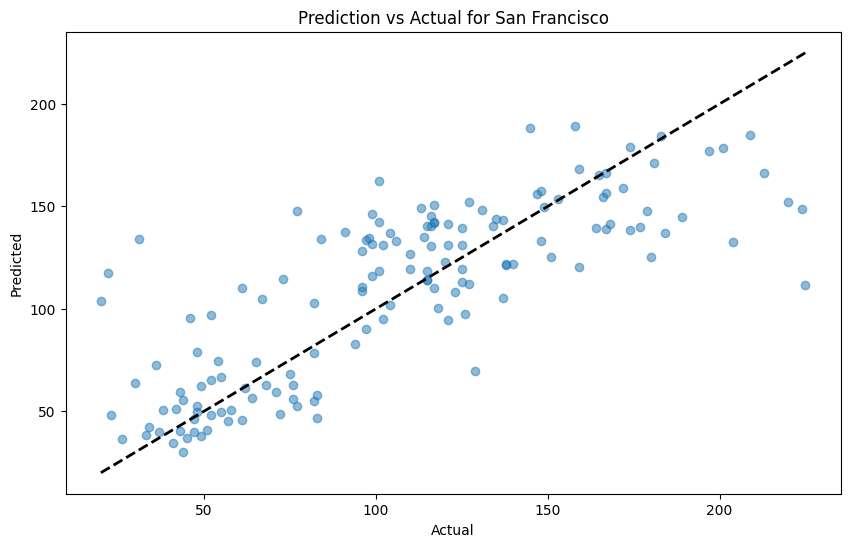

Model and predictions for San Francisco loaded and plotted.


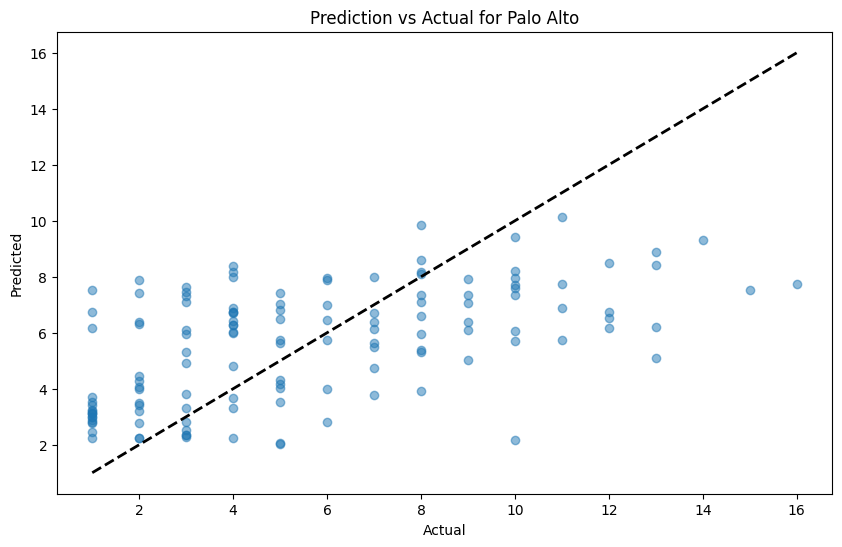

Model and predictions for Palo Alto loaded and plotted.


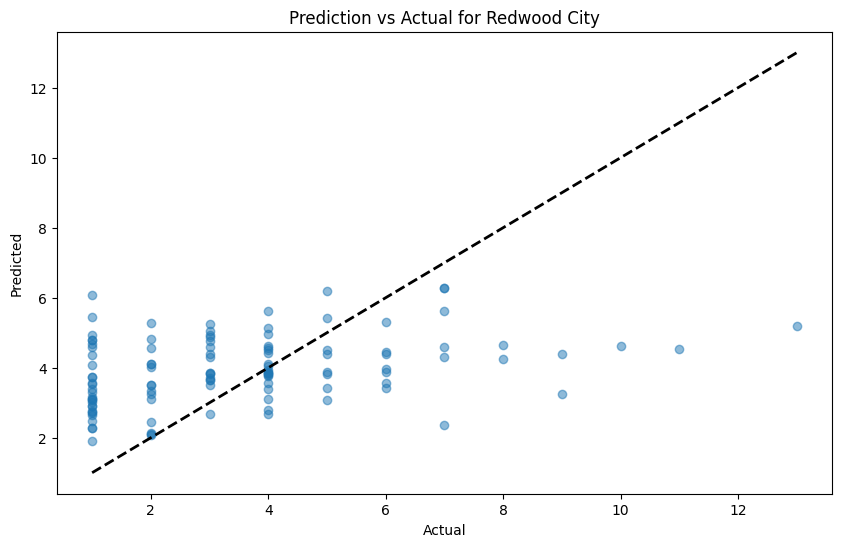

Model and predictions for Redwood City loaded and plotted.


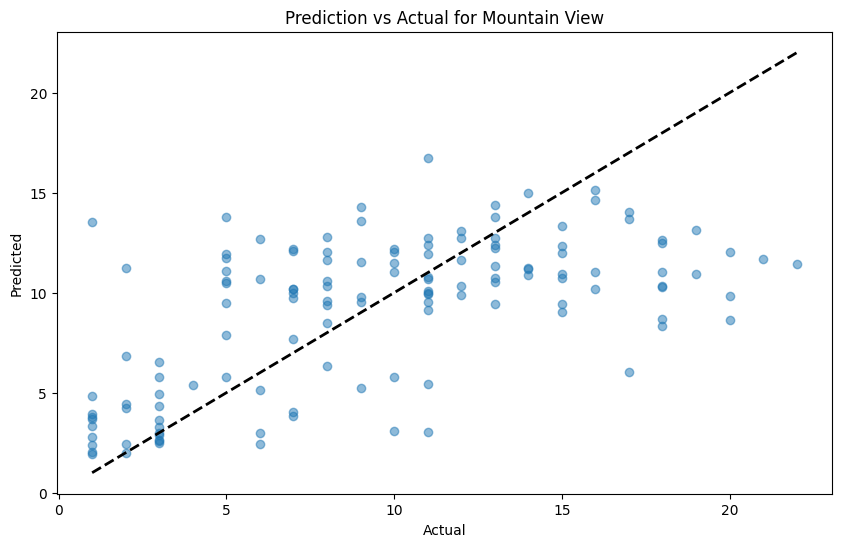

Model and predictions for Mountain View loaded and plotted.


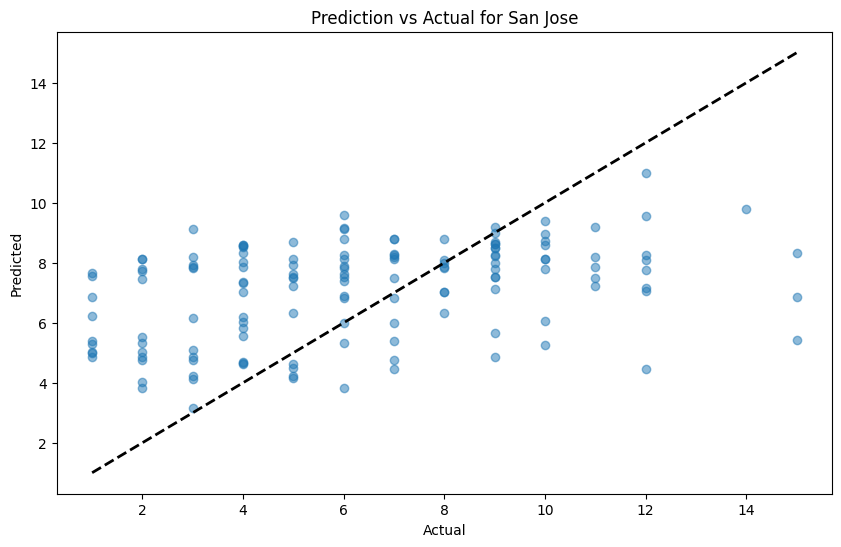

Model and predictions for San Jose loaded and plotted.


In [ ]:
import matplotlib.pyplot as plt

# Define the plot function
def plot_prediction_vs_actual(y_true, y_pred, dataset_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Prediction vs Actual for {dataset_name}')
    plt.show()

# Assuming you have X_test and y_test for each city
test_datasets = {
    "San Francisco": (X_test_sf_scaled, y_test_sf),
    "Palo Alto": (X_test_pa_scaled, y_test_pa),
    "Redwood City": (X_test_re_scaled, y_test_re),
    "Mountain View": (X_test_mv_scaled, y_test_mv),
    "San Jose": (X_test_sj_scaled, y_test_sj)
}

# Load the models from pickle files and generate the plots
for city, (X_test_scaled, y_test) in test_datasets.items():
    filename = f"{city.replace(' ', '_').lower()}_gb_final_model.pkl"
    with open(filename, 'rb') as file:
        model = pickle.load(file)

    # Generate predictions
    y_test_pred = model.predict(X_test_scaled)

    # Plot the results
    plot_prediction_vs_actual(y_test, y_test_pred, city)
    print(f"Model and predictions for {city} loaded and plotted.")


| Dataset        | Model                   | MSE            | RMSE         | R²      | Comments                                           |
|----------------|-------------------------|----------------|--------------|---------|----------------------------------------------------|
| **San Francisco**  | Base Random Forest      | 1020.55        | 31.95        | 0.651   | Base performance stable across methods             |
|                | Bayesian Optimization   | 939.06         | N/A          | 0.679   | Improved R² with optimization                      |
|                | ExtraTrees Base         | 1020.55        | 31.946       | 0.6512  | Similar to Random Forest base                      |
|                | ExtraTrees Optimization | 939.06         | N/A          | 0.679   | Matches Bayesian Optimization improvement          |
|                | XG Boost Baseline       | 1084.90        | 32.94        | 0.629   | Slightly worse than Random Forest                  |
|                | XG Boost Optimization   | 881.12         | N/A          | 0.699   | Best R² observed across all models                 |
|                | Gradient Boosting Base  | 1144.87        | N/A          | 0.609   | Lowest initial R² among models                     |
|                | Gradient Boosting Opt   | 975.50         | N/A          | 0.667   | Significant R² improvement with optimization       |
| **Palo Alto**      | Base Random Forest      | 11.12          | 3.33         | 0.218   | Base line set for improvements                     |
|                | Bayesian Optimization   | 9.87           | N/A          | 0.306   | Noticeable improvement in R²                       |
|                | ExtraTrees Base         | 11.12          | 3.334        | 0.2184  | Consistent with Random Forest base                 |
|                | ExtraTrees Optimization | 9.87           | N/A          | 0.306   | Consistent improvements in optimization            |
|                | XG Boost Baseline       | 15.00          | 3.87         | -0.054  | Underperforms in base comparison                   |
|                | XG Boost Optimization   | 11.30          | N/A          | 0.206   | Improvement but still lower R² than base models    |
|                | Gradient Boosting Base  | 12.64          | N/A          | 0.111   | Lowest base R², needs improvement                  |
|                | Gradient Boosting Opt   | 10.88          | N/A          | 0.235   | Best R² improvement among optimizations            |
| **Redwood City** | Base Random Forest      | 4.78           | 2.19         | 0.030   | Low baseline performance across metrics            |
|                | Bayesian Optimization   | 4.23           | N/A          | 0.143   | Small but significant improvement in R²            |
|                | ExtraTrees Base         | 4.78           | 2.187        | 0.0304  | Identical to Random Forest base                    |
|                | ExtraTrees Optimization | 4.23           | N/A          | 0.143   | Matches improvement of Bayesian Optimization       |
|                | XG Boost Baseline       | 5.11           | 2.26         | -0.037  | Performs worse than baseline models                |
|                | XG Boost Optimization   | 4.48           | N/A          | 0.091   | Improvement but still underwhelming                |
|                | Gradient Boosting Base  | 5.17           | N/A          | -0.047  | Starts off poorly, lowest initial R²               |
|                | Gradient Boosting Opt   | 4.30           | N/A          | 0.128   | Improves but doesn't outperform Bayesian models    |
| **Mountain View**| Base Random Forest      | 14.97          | 3.87         | 0.399   | Moderate baseline performance                      |
|                | Bayesian Optimization   | 14.85          | N/A          | 0.404   | Slight improvement in R²                           |
|                | ExtraTrees Base         | 14.97          | 3.869        | 0.3988  | Consistent with Random Forest baseline             |
|                | ExtraTrees Optimization | 14.85          | N/A          | 0.404   | Matches improvement in Bayesian Optimization       |
|                | XG Boost Baseline       | 16.49          | 4.06         | 0.338   | Lower performance in baseline                      |
|                | XG Boost Optimization   | 15.72          | N/A          | 0.368   | Improvement noted but still not top performing     |
|                | Gradient Boosting Base  | 16.76          | N/A          | 0.327   | Lowest initial R² among models                     |
|                | Gradient Boosting Opt   | 15.57          | N/A          | 0.375   | Noticeable R² improvement, yet behind competitors  |
| **San Jose**     | Base Random Forest      | 13.83          | 3.72         | 0.188   | Setting the base for improvements                  |
|                | Bayesian Optimization   | 13.07          | N/A          | 0.233   | Good improvement in R²                             |
|                | ExtraTrees Base         | 13.83          | 3.719        | 0.1885  | Matches Random Forest baseline                     |
|                | ExtraTrees Optimization | 13.07          | N/A          | 0.233   | Consistent optimization performance                |
|                | XG Boost Baseline       | 15.01          | 3.87         | 0.119   | Lower performance compared to base                 |
|                | XG Boost Optimization   | 13.13          | N/A          | 0.229   | Improved but not the best among models             |
|                | Gradient Boosting Base  | 13.71          | N/A          | 0.195   | Slightly better initial R²                         |
|                | Gradient Boosting Opt   | 13.37          | N/A          | 0.215   | Moderate improvement in R²                         |

#### **XGBoost Regressor has the highest performing algorithm**

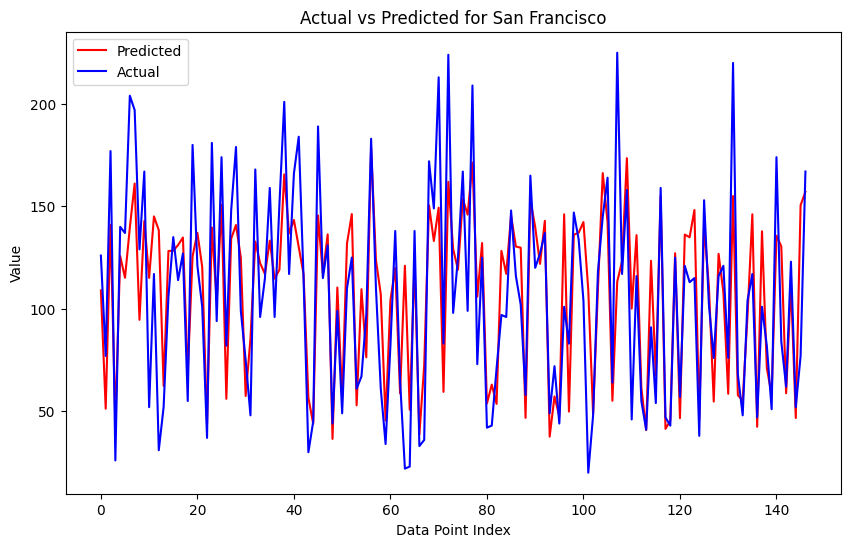

Model and predictions for San Francisco loaded and plotted.


In [ ]:
import pickle
import matplotlib.pyplot as plt

# Define the plot function
def plot_actual_vs_predicted(y_test, predictions, title):
    plt.figure(figsize=(10, 6))
    plt.plot(predictions, label='Predicted', color='red')
    plt.plot(y_test.values, label='Actual', color='blue')
    plt.title(title)
    plt.xlabel('Data Point Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Assuming you have X_test and y_test for each city
test_datasets = {
    "San Francisco": (X_test_sf_scaled, y_test_sf)
}

# Load the models from pickle files and generate the plots
for city, (X_test_scaled, y_test) in test_datasets.items():
    filename = f"{city.replace(' ', '_').lower()}_final_model.pkl"
    with open(filename, 'rb') as file:
        model = pickle.load(file)

    # Generate predictions
    y_test_pred = model.predict(X_test_scaled)

    # Plot the results
    plot_actual_vs_predicted(y_test, y_test_pred, f"Actual vs Predicted for {city}")
    print(f"Model and predictions for {city} loaded and plotted.")


### Now, to build the webapp

In [ ]:
# Assuming you have test datasets defined somewhere in your script
test_datasets = {
    'san_francisco': (X_test_sf_scaled, y_test_sf),
    'mountain_view': (X_test_mv_scaled, y_test_mv),
    'san_jose': (X_test_sj_scaled, y_test_sj),
    'redwood_city': (X_test_re_scaled, y_test_re),
    'palo_alto': (X_test_pa_scaled, y_test_pa)
}

In [ ]:
import pickle

# Load the trained models for each city from pickle files
for city, (X_test_scaled, y_test) in test_datasets.items():
    filename = f"{city.replace(' ', '_').lower()}_RFR_final_model.pkl"
    with open(filename, 'rb') as file:
        model = pickle.load(file)

In [ ]:
print("Number of features in training data:", X_train_sf_scaled.shape[1])  # Example for San Francisco
print("Number of features in test data:", X_test_sf_scaled.shape[1])

Number of features in training data: 29
Number of features in test data: 29


In [ ]:
from sklearn.pipeline import Pipeline
# Define the pipeline
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100))
])

# Fit the pipeline on your training data
pipe.fit(X_train_sf, y_train_sf)  # Here, X_train_sf should be the raw data, not scaled

# After fitting, you can check or use your model
print("Model training complete.")

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Model training complete.


In [ ]:
# Check the shape just before prediction
print("Shape of X_test_sf before prediction:", X_test_sf_scaled.shape)

Shape of X_test_sf before prediction: (147, 29)


In [ ]:
# Assuming this line was used for training and should be rechecked
pipe.fit(X_train_sf, y_train_sf)
print("Features the scaler was trained on:", pipe.named_steps['scaler'].n_features_in_)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Features the scaler was trained on: 29


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import pickle

# Assuming the creation of the pipeline was correct
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100))
])

# Fitting the pipeline with your data (make sure this is done correctly)
pipe.fit(X_train_sf_scaled, y_train_sf)

# Saving the entire pipeline
with open('sf_RFR_final_model.pkl', 'wb') as f:
    pickle.dump(pipe, f)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [ ]:
# Fitting the pipeline with your data (make sure this is done correctly)
pipe.fit(X_train_sj_scaled, y_train_sj)

# Saving the entire pipeline
with open('sj_RFR_final_model.pkl', 'wb') as f:
    pickle.dump(pipe, f)

# Fitting the pipeline with your data (make sure this is done correctly)
pipe.fit(X_train_re_scaled, y_train_re)

# Saving the entire pipeline
with open('re_RFR_final_model.pkl', 'wb') as f:
    pickle.dump(pipe, f)


# Fitting the pipeline with your data (make sure this is done correctly)
pipe.fit(X_train_mv_scaled, y_train_mv)

# Saving the entire pipeline
with open('mv_RFR_final_model.pkl', 'wb') as f:
    pickle.dump(pipe, f)


# Fitting the pipeline with your data (make sure this is done correctly)
pipe.fit(X_train_pa_scaled, y_train_pa)

# Saving the entire pipeline
with open('pa_RFR_final_model.pkl', 'wb') as f:
    pickle.dump(pipe, f)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

In [ ]:
with open('sf_RFR_final_model.pkl', 'rb') as f:
    loaded_pipe = pickle.load(f)

if 'scaler' in loaded_pipe.named_steps:
    print("Features the scaler in the loaded pipeline was trained on:", loaded_pipe.named_steps['scaler'].n_features_in_)
else:
    print("No scaler found in the loaded pipeline.")


Features the scaler in the loaded pipeline was trained on: 29


In [ ]:
with open('sj_RFR_final_model.pkl', 'rb') as f:
    loaded_pipe = pickle.load(f)

if 'scaler' in loaded_pipe.named_steps:
    print("Features the scaler in the loaded pipeline was trained on:", loaded_pipe.named_steps['scaler'].n_features_in_)
else:
    print("No scaler found in the loaded pipeline.")


Features the scaler in the loaded pipeline was trained on: 29


In [ ]:
with open('mv_RFR_final_model.pkl', 'rb') as f:
    loaded_pipe = pickle.load(f)

if 'scaler' in loaded_pipe.named_steps:
    print("Features the scaler in the loaded pipeline was trained on:", loaded_pipe.named_steps['scaler'].n_features_in_)
else:
    print("No scaler found in the loaded pipeline.")


Features the scaler in the loaded pipeline was trained on: 29


In [ ]:
with open('re_RFR_final_model.pkl', 'rb') as f:
    loaded_pipe = pickle.load(f)

if 'scaler' in loaded_pipe.named_steps:
    print("Features the scaler in the loaded pipeline was trained on:", loaded_pipe.named_steps['scaler'].n_features_in_)
else:
    print("No scaler found in the loaded pipeline.")


Features the scaler in the loaded pipeline was trained on: 29


In [ ]:
with open('pa_RFR_final_model.pkl', 'rb') as f:
    loaded_pipe = pickle.load(f)

if 'scaler' in loaded_pipe.named_steps:
    print("Features the scaler in the loaded pipeline was trained on:", loaded_pipe.named_steps['scaler'].n_features_in_)
else:
    print("No scaler found in the loaded pipeline.")


Features the scaler in the loaded pipeline was trained on: 29


In [ ]:
try:
    with open('sf_RFR_final_model.pkl', 'rb') as f:
        loaded_pipe = pickle.load(f)
    print("Features the scaler in the loaded pipeline was trained on:", loaded_pipe.named_steps['scaler'].n_features_in_)
except AttributeError as e:
    print("Failed to load a pipeline. Please check the object type in the pickle file:", e)


Features the scaler in the loaded pipeline was trained on: 29


In [ ]:
try:
    with open('sj_RFR_final_model.pkl', 'rb') as f:
        loaded_pipe = pickle.load(f)
    print("Features the scaler in the loaded pipeline was trained on:", loaded_pipe.named_steps['scaler'].n_features_in_)
except AttributeError as e:
    print("Failed to load a pipeline. Please check the object type in the pickle file:", e)


Features the scaler in the loaded pipeline was trained on: 29


In [ ]:
try:
    with open('mv_RFR_final_model.pkl', 'rb') as f:
        loaded_pipe = pickle.load(f)
    print("Features the scaler in the loaded pipeline was trained on:", loaded_pipe.named_steps['scaler'].n_features_in_)
except AttributeError as e:
    print("Failed to load a pipeline. Please check the object type in the pickle file:", e)


Features the scaler in the loaded pipeline was trained on: 29


In [ ]:
try:
    with open('re_RFR_final_model.pkl', 'rb') as f:
        loaded_pipe = pickle.load(f)
    print("Features the scaler in the loaded pipeline was trained on:", loaded_pipe.named_steps['scaler'].n_features_in_)
except AttributeError as e:
    print("Failed to load a pipeline. Please check the object type in the pickle file:", e)


Features the scaler in the loaded pipeline was trained on: 29


In [ ]:
try:
    with open('pa_RFR_final_model.pkl', 'rb') as f:
        loaded_pipe = pickle.load(f)
    print("Features the scaler in the loaded pipeline was trained on:", loaded_pipe.named_steps['scaler'].n_features_in_)
except AttributeError as e:
    print("Failed to load a pipeline. Please check the object type in the pickle file:", e)


Features the scaler in the loaded pipeline was trained on: 29
